# **Probability Practice**
## Part A:

The total probability of a user answering Yes:
$$
P(Y) = P(Y \mid R) \cdot P(R) + P(Y \mid T) \cdot P(T)
$$
From the survey results:

The fraction who answered Yes is 65%, so $P(Y) = 0.65$

The fraction of random clickers (RC) is 0.3, so $P(R) = 0.3$

The fraction of truthful clickers (TC) is $1-P(RC)$, so $P(T) = 0.7$

The probability that a Random Clicker answers Yes, $P(Y∣R)$, is 0.5 

Substitute the known values into the equation:
$$
0.65=(0.5*0.3)+P(Y \mid T) *⋅0.7
$$

$$
P(Y \mid T) = 0.714
$$


## Part B:

**Given:**

Sensitivity: $P(Positive\mid Disease) = 0.993$

Specificity: $P(Negative\mid No Disease) = 0.9999$

$P(Disease) = 0.000025$

**Asked:**

$P(Disease \mid Positive) = ?$

**Approach:**

From Baye's Theorem:     
$
P(Disease \mid Positive)= \frac{P(\text{Positive} \mid \text{Disease}) * P(\text{Disease})}{P(\text{Positive})}
$
​

We need to calculate $P(Positive)$

$$
P(Positive)=P(Positive∣Disease)*P(Disease)+P(Positive∣No Disease)*P(No Disease)
$$

$P(Positive \mid Disease)=0.993$

$P(Disease)=0.000025$

$P(No Disease)=1−P(Disease)=0.999975$

$P(Positive \mid No Disease)=1−P(Negative \mid No Disease)=1−0.9999=0.0001$

Hence, $P(Positive)=(0.993*0.000025)+(0.0001*0.999975)$

$P(Positive)=0.0001248$

$$
P(Disease \mid Positive)= \frac{ 0.993*0.000025}{0.0001248}
$$

$$
P(Disease \mid Positive)=0.1989
$$
​
##### **Hence, the probability that someone has the disease given that they tested positive is approximately 19.9%.**

# **Wrangling the Billboard Top 100**

## Part A:

In [10]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [12]:
# Read CSV file and see top 5 rows of dataset
data = pd.read_csv('billboard.csv')
data.head()

Unnamed: 0                                                url    week_id  \
0           1  http://www.billboard.com/charts/hot-100/1965-0...  7/17/1965   
1           2  http://www.billboard.com/charts/hot-100/1965-0...  7/24/1965   
2           3  http://www.billboard.com/charts/hot-100/1965-0...  7/31/1965   
3           4  http://www.billboard.com/charts/hot-100/1965-0...   8/7/1965   
4           5  http://www.billboard.com/charts/hot-100/1965-0...  8/14/1965   

   week_position                    song   performer  \
0             34  Don't Just Stand There  Patty Duke   
1             22  Don't Just Stand There  Patty Duke   
2             14  Don't Just Stand There  Patty Duke   
3             10  Don't Just Stand There  Patty Duke   
4              8  Don't Just Stand There  Patty Duke   

                            song_id  instance  previous_week_position  \
0  Don't Just Stand TherePatty Duke         1                    45.0   
1  Don't Just Stand TherePatty Duke         1                    34.0   
2  Don't Just Stand TherePatty Duke         1                    22.0   
3  Don't Just Stand TherePatty Duke         1                    14.0   
4  Don't Just Stand TherePatty Duke         1                    10.0   

   peak_position  weeks_on_chart  year  week  
0             34               4  1965    29  
1             22               5  1965    30  
2             14               6  1965    31  
3             10               7  1965    32  
4              8               8  1965    33

In [14]:
# Groupby songs by performer and song and count on week.

popular_songs = data.groupby(['performer', 'song'])['week'].count().reset_index(name='Count')
top_popular_songs=popular_songs.sort_values(by='Count',ascending=False)
top_10_popular_songs = top_popular_songs[:10]
print("Top 10 Popular Songs and Performers: \nThis table displays the top 10 songs \
and their performers based on the count of weeks each song appeared.",  "\nThe 'COUNT' column indicates the number of weeks the song was listed.")
top_10_popular_songs

Top 10 Popular Songs and Performers: 
This table displays the top 10 songs and their performers based on the count of weeks each song appeared. 
The 'COUNT' column indicates the number of weeks the song was listed.


performer  \
11194                            Imagine Dragons   
403                                   AWOLNATION   
27121                                 The Weeknd   
12026                                 Jason Mraz   
15008                                LeAnn Rimes   
18752                                OneRepublic   
14807  LMFAO Featuring Lauren Bennett & GoonRock   
12421                                      Jewel   
506                                        Adele   
4347                            Carrie Underwood   

                                      song  Count  
11194                          Radioactive     87  
403                                   Sail     79  
27121                      Blinding Lights     76  
12026                            I'm Yours     76  
15008                        How Do I Live     69  
18752                       Counting Stars     68  
14807                    Party Rock Anthem     68  
12421  Foolish Games/You Were Meant For Me     65  
506                    Rolling In The Deep     65  
4347                      Before He Cheats     64

## Part B:

In [17]:
#Remove data for 1958 and 2021 as per instructions
#Find number of unique songs every year based on song and performer 

data_trimmed = data[~data['year'].isin([1958, 2021])]
unique_songs = data_trimmed.drop_duplicates(subset=['song', 'performer']).groupby('year').size()
unique_songs

year
1959    658
1960    606
1961    676
1962    664
1963    662
       ... 
2016    409
2017    462
2018    593
2019    529
2020    680
Length: 62, dtype: int64

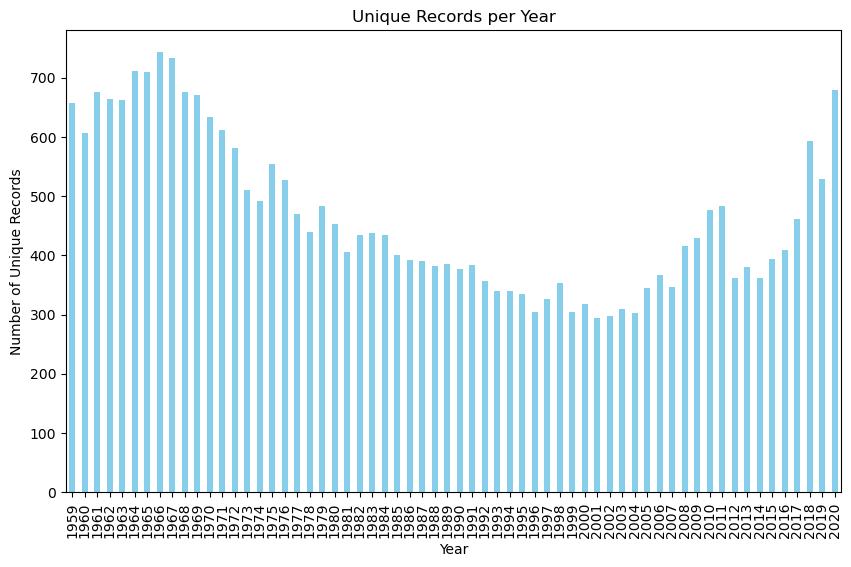

In [19]:
#Plot year vs number of unique records

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
unique_songs.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Unique Records')
plt.title('Unique Records per Year')
plt.xticks(rotation=90)  # Rotate the x-axis labels if necessary
plt.show()

## Part C:

In [22]:
ten_week_hit = popular_songs[popular_songs['Count']>=10].reset_index(drop=True)
ten_week_hit[:10]

performer                                             song  \
0         "Groove" Holmes                                            Misty   
1  "Little" Jimmy Dickens        May The Bird Of Paradise Fly Up Your Nose   
2     "Weird Al" Yankovic                                   Amish Paradise   
3     "Weird Al" Yankovic                                           Eat It   
4     "Weird Al" Yankovic                              Smells Like Nirvana   
5     "Weird Al" Yankovic                                    White & Nerdy   
6                 'N Sync  (God Must Have Spent) A Little More Time On You   
7                 'N Sync                                      Bye Bye Bye   
8                 'N Sync                                             Gone   
9                 'N Sync                             I Drive Myself Crazy   

   Count  
0     11  
1     10  
2     16  
3     12  
4     11  
5     20  
6     22  
7     23  
8     24  
9     12

In [24]:
performer_songs = ten_week_hit.groupby('performer')['song'].count().reset_index(name='Count')
performer_30 = performer_songs[performer_songs['Count']>=30].sort_values(by='Count', ascending=False)
performer_30

performer  Count
1633             Elton John     52
3355                Madonna     44
2856          Kenny Chesney     42
5652             Tim McGraw     39
2833            Keith Urban     36
4857          Stevie Wonder     36
4982           Taylor Swift     35
3567        Michael Jackson     34
4424            Rod Stewart     33
5478     The Rolling Stones     33
507              Billy Joel     32
1514                  Drake     31
946                 Chicago     31
4261          Rascal Flatts     31
1256  Daryl Hall John Oates     30
1996          George Strait     30
2391           Jason Aldean     30
675            Brad Paisley     30
3772           Neil Diamond     30

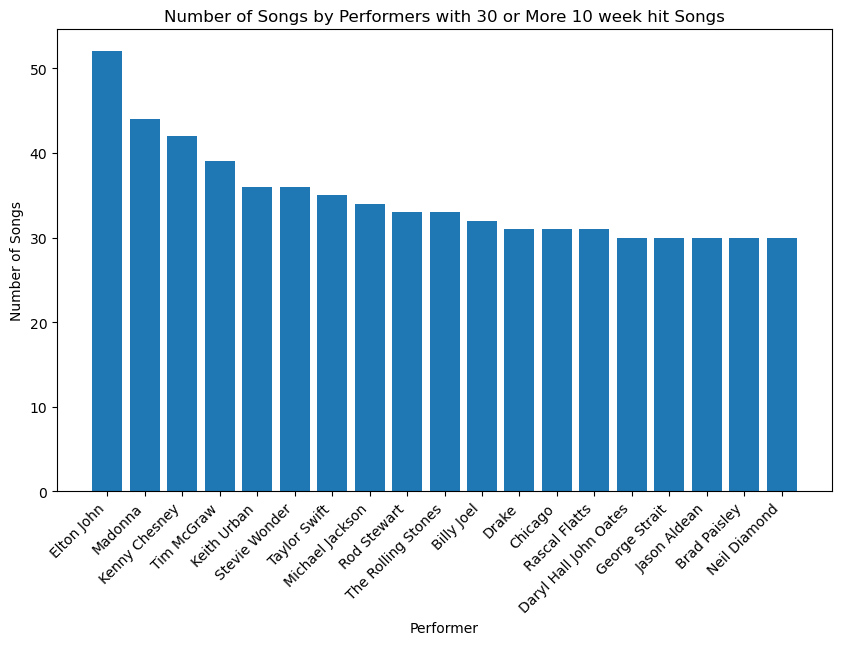

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(performer_30['performer'], performer_30['Count'])
plt.xlabel('Performer')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Performers with 30 or More 10 week hit Songs')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visual story telling part 1: green buildings

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [31]:
green_df = pd.read_csv('greenbuildings.csv')
green_df[:10]

CS_PropertyID  cluster    size  empl_gr   Rent  leasing_rate  stories  age  \
0         379105        1  260300     2.22  38.56         91.39       14   16   
1         122151        1   67861     2.22  28.57         87.14        5   27   
2         379839        1  164848     2.22  33.31         88.94       13   36   
3          94614        1   93372     2.22  35.00         97.04       13   46   
4         379285        1  174307     2.22  40.69         96.58       16    5   
5          94765        1  231633     2.22  43.16         92.74       14   20   
6         236739        6  210038     4.01  12.50         94.33       11   38   
7         234578        6  225895     4.01  14.77         91.02       15   24   
8          42087        6  912011     4.01  17.00         99.32       31   34   
9         233989        6  518578     4.01  17.00         93.54       21   36   

   renovated  class_a  ...  green_rating  net  amenities  cd_total_07  \
0          0        1  ...             1    0          1         4988   
1          0        0  ...             0    0          1         4988   
2          1        0  ...             0    0          1         4988   
3          1        0  ...             0    0          0         4988   
4          0        1  ...             0    0          1         4988   
5          0        1  ...             0    0          1         4988   
6          0        0  ...             1    0          1         2746   
7          0        1  ...             0    0          1         2746   
8          0        1  ...             0    0          1         2746   
9          1        1  ...             0    0          1         2746   

   hd_total07  total_dd_07  Precipitation  Gas_Costs  Electricity_Costs  \
0          58         5046          42.57   0.013700           0.029000   
1          58         5046          42.57   0.013731           0.029045   
2          58         5046          42.57   0.013731           0.029045   
3          58         5046          42.57   0.013731           0.029045   
4          58         5046          42.57   0.013731           0.029045   
5          58         5046          42.57   0.013731           0.029045   
6        1670         4416          25.55   0.010100           0.028900   
7        1670         4416          25.55   0.010118           0.028869   
8        1670         4416          25.55   0.010118           0.028869   
9        1670         4416          25.55   0.010118           0.028869   

   cluster_rent  
0         36.78  
1         36.78  
2         36.78  
3         36.78  
4         36.78  
5         36.78  
6         17.50  
7         17.50  
8         17.50  
9         17.50  

[10 rows x 23 columns]

### Data Cleaning

In [34]:
green_df.isnull().sum()

CS_PropertyID         0
cluster               0
size                  0
empl_gr              74
Rent                  0
leasing_rate          0
stories               0
age                   0
renovated             0
class_a               0
class_b               0
LEED                  0
Energystar            0
green_rating          0
net                   0
amenities             0
cd_total_07           0
hd_total07            0
total_dd_07           0
Precipitation         0
Gas_Costs             0
Electricity_Costs     0
cluster_rent          0
dtype: int64

##### Since we have 74 nulls in the year-on-year growth rate in employment in the building's geographic region, we wanted to impute them with either mean or median. Since mean was more skewed, decided to impute the values with median.

In [37]:
#imputing empl_gr with median
green_df['empl_gr'] = green_df['empl_gr'].fillna(green_df['empl_gr'].median())

##### Dropping 'CS_PropertyID' as it is unique id and 'LEED', 'Energystar' as they just indicate green rating.

In [40]:
green_df = green_df.drop(columns=['CS_PropertyID', 'LEED', 'Energystar'])

In [42]:
# checking out the dataset
green_df.describe()

cluster          size      empl_gr         Rent  leasing_rate  \
count  7894.000000  7.894000e+03  7894.000000  7894.000000   7894.000000   
mean    588.615024  2.346377e+05     3.195127    28.418569     82.606371   
std     399.907509  2.975334e+05     8.125508    15.075483     21.380315   
min       1.000000  1.624000e+03   -24.950000     2.980000      0.000000   
25%     272.000000  5.089125e+04     1.740000    19.500000     77.850000   
50%     476.000000  1.288380e+05     1.970000    25.160000     89.530000   
75%    1044.000000  2.942120e+05     2.380000    34.180000     96.440000   
max    1230.000000  3.781045e+06    67.780000   250.000000    100.000000   

           stories          age    renovated      class_a      class_b  \
count  7894.000000  7894.000000  7894.000000  7894.000000  7894.000000   
mean     13.584495    47.243983     0.379529     0.399924     0.459463   
std      12.287083    32.194393     0.485300     0.489913     0.498386   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       4.000000    23.000000     0.000000     0.000000     0.000000   
50%      10.000000    34.000000     0.000000     0.000000     0.000000   
75%      19.000000    79.000000     1.000000     1.000000     1.000000   
max     110.000000   187.000000     1.000000     1.000000     1.000000   

       green_rating          net    amenities  cd_total_07   hd_total07  \
count   7894.000000  7894.000000  7894.000000  7894.000000  7894.000000   
mean       0.086775     0.034710     0.526602  1229.354193  3432.042311   
std        0.281523     0.183056     0.499323  1104.588925  1976.937255   
min        0.000000     0.000000     0.000000    39.000000     0.000000   
25%        0.000000     0.000000     0.000000   684.000000  1419.000000   
50%        0.000000     0.000000     1.000000   966.000000  2739.000000   
75%        0.000000     0.000000     1.000000  1620.000000  4796.000000   
max        1.000000     1.000000     1.000000  5240.000000  7200.000000   

       total_dd_07  Precipitation    Gas_Costs  Electricity_Costs  \
count  7894.000000    7894.000000  7894.000000        7894.000000   
mean   4661.396504      31.081312     0.011336           0.030959   
std    1984.326881      11.575219     0.002406           0.008534   
min    2103.000000      10.460000     0.009487           0.017800   
25%    2869.000000      22.710000     0.010296           0.023300   
50%    4979.000000      23.160000     0.010296           0.032737   
75%    6413.000000      43.890000     0.011816           0.037808   
max    8244.000000      58.020000     0.028914           0.062800   

       cluster_rent  
count   7894.000000  
mean      27.497285  
std       10.598952  
min        9.000000  
25%       20.000000  
50%       25.145000  
75%       34.000000  
max       71.440000

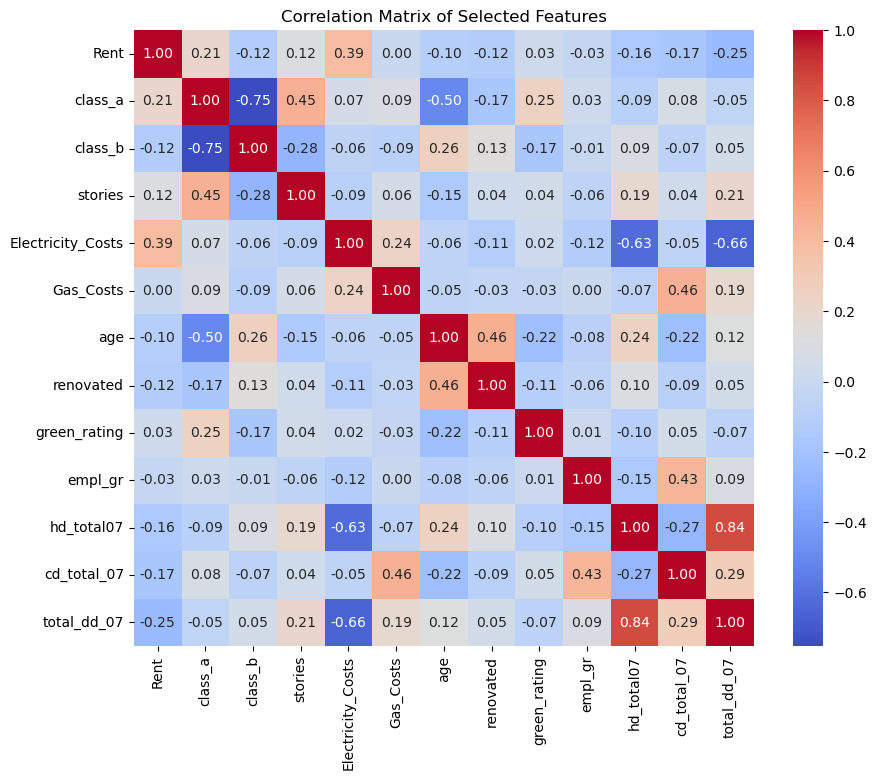

In [44]:
selected_features = ['Rent','class_a','class_b', 'stories', 'Electricity_Costs', 'Gas_Costs',
                     'age', 'renovated', 'green_rating', 'empl_gr', 'hd_total07','cd_total_07','total_dd_07']

# Select these features from the DataFrame
X_selected = green_df[selected_features]

# Calculate the correlation matrix
correlation_matrix = X_selected.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()

#### Can't see much of correlation here except for

  - **Rent and class A**
  - **Rent and Electricity Costs**
  - **Stories and Class A**
  - **Gas cost and cooling days**
  - **age and renovated etc.**

##### Now we want to see if having amenities had any effect on rent of green buildings.

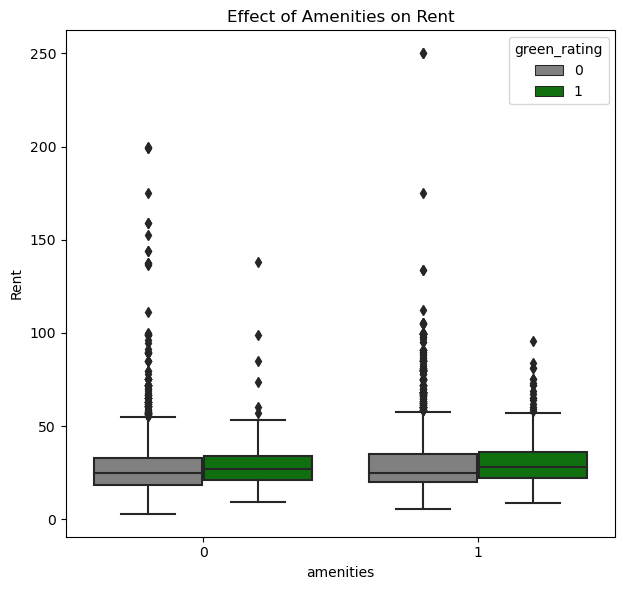

In [48]:
plt.figure(figsize=(12, 6))

palette = ['gray', 'green']

plt.subplot(1, 2, 1)
sns.boxplot(x='amenities', y='Rent', data=green_df, hue='green_rating', palette=['gray', 'green'])
plt.title('Effect of Amenities on Rent')
plt.xticks()

plt.tight_layout()
plt.show()

##### This is as expected. If amenities are present, rent is higher. On top of that if the building is green rated and amenities are present, rent will generally be high.

##### Number of buildings with less than 10 % occupancy rate

In [52]:
green_df[green_df['leasing_rate'] < 10].shape[0]

215

##### Let us see rent distribution of these 215 buildings and check how many of these have green rating.

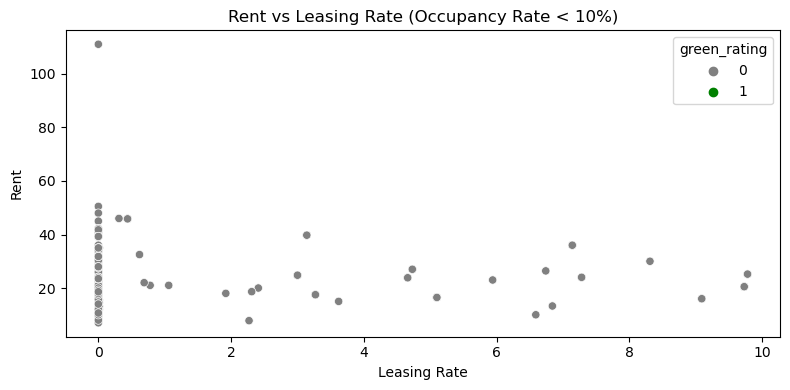

In [55]:
# Filter the data for occupancy rate less than 10%
filtered_df = green_df[green_df['leasing_rate'] < 10]

plt.figure(figsize=(8, 4))

# Plotting Rent vs Leasing_Rate with filtered data
plt.subplot(1, 1, 1)
sns.scatterplot(x='leasing_rate', y='Rent', data=filtered_df, hue='green_rating', palette=['gray', 'green'])
plt.title('Rent vs Leasing Rate (Occupancy Rate < 10%)')
plt.ylabel('Rent')
plt.xlabel('Leasing Rate')

plt.tight_layout()
plt.show()

##### There are no green buildings with less than 10 % leasing rate. Since excel guru got rid of buildings with less than 10 per occupancy rate, let's also do the same.

In [58]:
green_df = green_df[green_df['leasing_rate'] >= 10]

##### Let's have an initial look on medians.

In [61]:
# Calculate average rent for green_rating = 0
median_rent_green0 = green_df[green_df['green_rating'] == 0]['Rent'].median()
print("Median rent for buildings with no green rating:", median_rent_green0)

# Calculate average rent for green_rating = 1
median_rent_green1 = green_df[green_df['green_rating'] == 1]['Rent'].median()
print("Median rent for buildings with green_rating:", median_rent_green1)

Median rent for buildings with no green rating: 25.03
Median rent for buildings with green_rating: 27.6


##### The results are similar to what excel guru found.

##### Since our building is just across I-35 from Downtown, we make an assumption that it is Class A building.

#### Number of Class A green rated buildings

In [65]:
green_df[(green_df['class_a'] == 1) & (green_df['green_rating'] == 1)].shape[0]

546

##### Also the building has 15 stories. Lets see the effect of stories on rent.

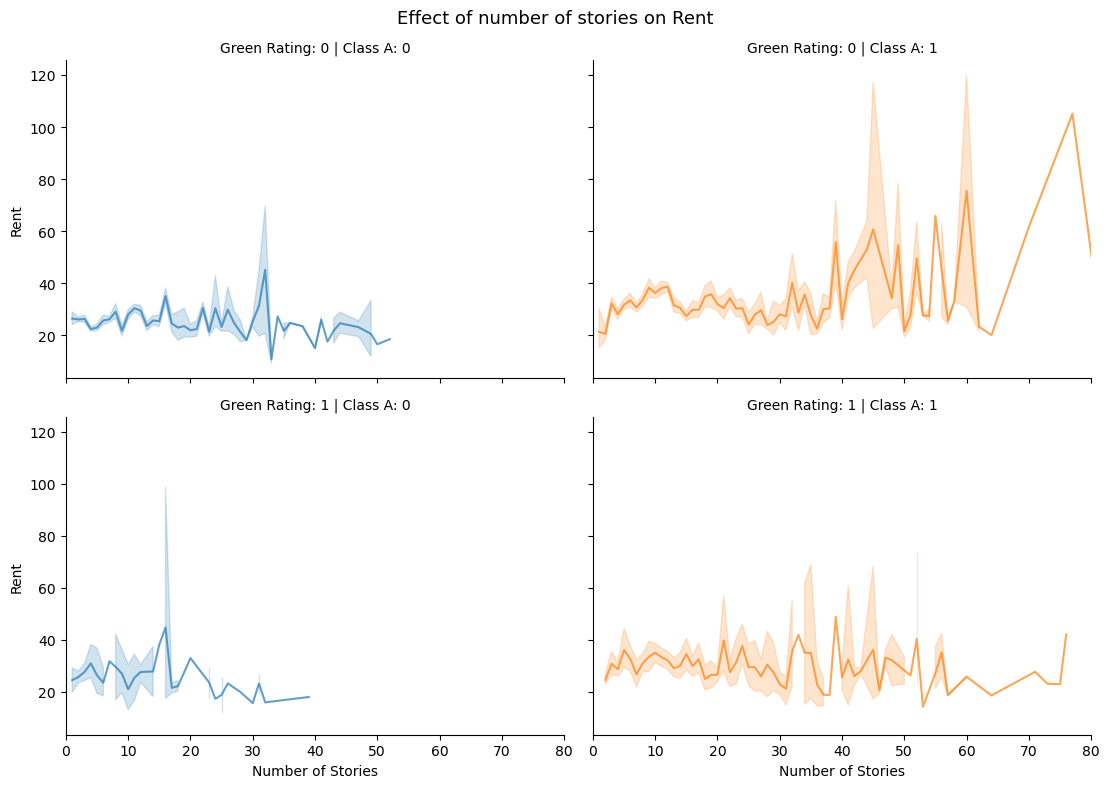

In [68]:
g = sns.FacetGrid(green_df, col='class_a', row='green_rating', hue='class_a', height=4, aspect=1.4)

g.map(sns.lineplot, 'stories', 'Rent', alpha=0.7)

g.set_titles(row_template='Green Rating: {row_name}', col_template='Class A: {col_name}')
g.set_axis_labels('Number of Stories', 'Rent')
g.fig.suptitle('Effect of number of stories on Rent', fontsize=13)

# Set x-axis limit for all subplots
for ax in g.axes.flat:
    ax.set_xlim(0, 80)

plt.tight_layout()
plt.show()


##### We can see a spike in rent for buildings with 15 stories for both class A and non class A which is the same as number of stories we are considering for our building.

#### Also for rents where utilities are included, we want to see how much cost would we have to pay from our pocket.¶

##### First let us explore how many green buildings have utility included

In [70]:
green_rating_utility_included = green_df[(green_df['net'] == 0) & (green_df['green_rating'] == 1)] # 645 rows

#of these, how many are class A
len(green_rating_utility_included[green_rating_utility_included['class_a'] == 1])

509

  - **645 out of 685 buildings are green buildings with utility included.**
  - **Out of those 509 are class A green buildings which have utility included.**

##### Hence, we are more likely to incur the costs for utilities like electricity and gas. So we are making another assumption here that if we are going green, utility cost will be included in the rent. Hence total rent will be Rent - utility_cost

#### Cost incurred for utility bills

In [75]:
green_df['utility_cost'] = green_df['Gas_Costs'] + green_df['Electricity_Costs']
temp_df = green_df[['class_a', 'green_rating', 'net', 'stories', 'age', 'utility_cost', 'leasing_rate','Rent']]

temp_df['Total_Rent'] = temp_df['Rent'] - temp_df['utility_cost']
temp_df.head()

class_a  green_rating  net  stories  age  utility_cost  leasing_rate  \
0        1             1    0       14   16      0.042700         91.39   
1        0             0    0        5   27      0.042776         87.14   
2        0             0    0       13   36      0.042776         88.94   
3        0             0    0       13   46      0.042776         97.04   
4        1             0    0       16    5      0.042776         96.58   

    Rent  Total_Rent  
0  38.56   38.517300  
1  28.57   28.527224  
2  33.31   33.267224  
3  35.00   34.957224  
4  40.69   40.647224

##### Let's see the data in numerical form.

In [ ]:
# Bin the number of stories
temp_df['stories_binned'] = pd.cut(temp_df['stories'], bins=[0, 5, 10, 15, 20, float('inf')],
                                   labels=['0-5', '6-10', '11-15', '16-20', '21+'])

# Calculate median rent for green and non-green buildings within each story bin
median_rents = temp_df.groupby(['green_rating', 'stories_binned'])['Total_Rent'].median().unstack()

median_rents


##### For 15 story class A building:

 - **Median rent = `$28.24` per square foot per year for non green building**
 - **Median rent = `$33.03` per square foot per year for green building**
 
##### Hence, we get about `$4.79` per square foot profit if we are going green.

##### Our building would be 250,000 square feet, this would translate into an additional  `$250,000.00 x 5 = $1,197,500.00` of extra revenue per year if we build the green building.

### But before concluding anything, let's see the effect of age on rent for green and non green buildings.

<Figure size 1000x600 with 0 Axes>

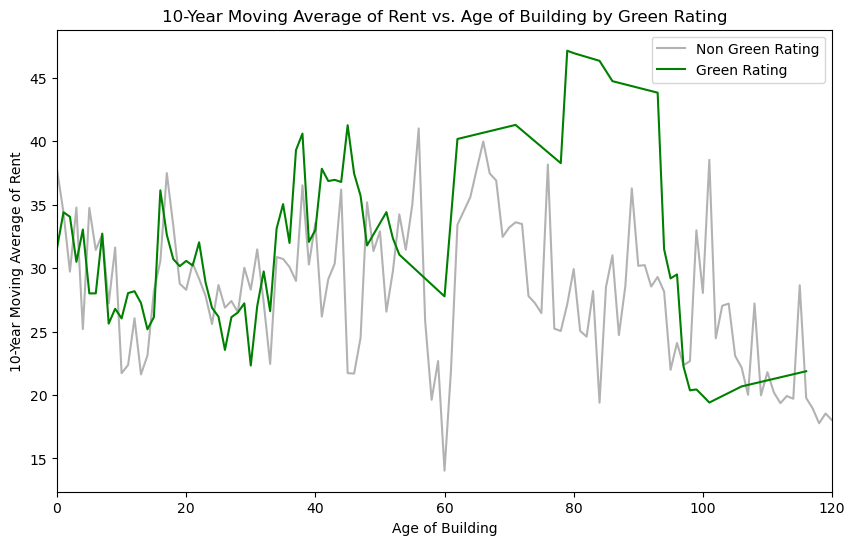

In [80]:
plt.figure(figsize=(10, 6))


temp_df = temp_df.sort_values(by='age')

# Calculate the 10-year moving average for 'Rent'
temp_df['Rent_MA'] = temp_df.groupby('green_rating')['Rent'].transform(lambda x: x.rolling(window=10, min_periods=1, center=True).mean())

# Create the plot
plt.figure(figsize=(10, 6))

# Plot gray line with reduced opacity for non-green rating
sns.lineplot(x='age', y='Rent_MA', data=temp_df[temp_df['green_rating'] == 0], errorbar=None, color='gray', alpha=0.6, label='Non Green Rating')

# Plot green line with full opacity for green rating
sns.lineplot(x='age', y='Rent_MA', data=temp_df[temp_df['green_rating'] == 1], errorbar=None, color='green', alpha=1.0, label='Green Rating')

# Set x-axis limit to show data only up to 120 years
plt.xlim(0, 120)

# Customize the plot
plt.title('10-Year Moving Average of Rent vs. Age of Building by Green Rating')
plt.xlabel('Age of Building')
plt.ylabel('10-Year Moving Average of Rent')
plt.legend()

##### As per the graph, the rent will be higher for green buildings as compared to non green building if the buidling is approximately 35+ years older.
##### This also reinforces the idea of going green.

### Summary/ Analysis:

As per Excel Guru, we can incur the extra cost of `$5M` in approximately 8 years.
As per our analysis, we performed following steps:
   - Treated the null values in the dataset by imputing them with median as mean was more skewed.
   - Dropped few of the columns like Cluster property Id, Leed or Energystar rating.
   - Dropped data with less than 10 per occupancy rate and got similar median as that of Excel guru for non-green and green buildings.
   - Calculated number of green buildings belonging to class A : 546
   - Calculated number of green buildings where utility rate is included in the rent : 645 rows
   - Explored relationship between number of stories and rent. We found 15 stories buildings to be ideal for high rent.

As per given data, the buidling is to be constructed just across I-35 from downtown (posh area) and it is a 15 storey building (most likely belonging to class A), we made few assumptions based on following data :
   - Number of green buidings with utility rate included is 645 out of total 685 buildings
   - 546 out of total 685 green buildings belonged to class A.

Following are the **assumptions** we made based on above data :

   - Building belongs to Class A
   - Utilities will be included in the rent

Then we performed following actions to get some insights:

   - Calculated Total rent by subtracting utility bills from Rent
   - Binned the number of stories of the building into buckets of '0-5', '6-10', '11-15', '16-20', '21+'

Hence, we got following data :

          Stories	0-5 	   6-10	      11-15	      16-20     	21+
green_rating					
0	             23.46454	  26.951896	  28.241896	  25.611896	   24.181013
1	             27.03750     29.951900	  33.037350	  26.463300	   25.200950

**For 15 storey building**:
  - median rent for non green building = `$28.24` per square foot per year
  - median rent for green building = `$33.03` per square foot per year

Hence, we get about `$4.79` per square foot profit if we are going green.

Our building would be 250,000 square feet, this would translate into an additional  `$250,000.00 x 5 = $1,197,500.00` of extra revenue per year if we build the green building.

Based on the extra revenue we would make, we would recuperate these costs in `$5000000/$1,197,500 = 4.17` years. Even if our occupancy rate were only 80%, we would still recuperate the costs in a little over 5 years.

Finally we saw the effect of age of building on the rent over a 10 year moving average. We found that at 40+ years, the building will be doing pretty well in terms of rent.
Hence it seems like a good financial move from our side as well.
   


# Visual story telling part 2: Capital Metro data

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [89]:
df = pd.read_csv('capmetro_UT.csv')
df.head()

timestamp  boarding  alighting day_of_week  temperature  \
0  2018-09-01 06:00:00         0          1         Sat        74.82   
1  2018-09-01 06:15:00         2          1         Sat        74.82   
2  2018-09-01 06:30:00         3          4         Sat        74.82   
3  2018-09-01 06:45:00         3          4         Sat        74.82   
4  2018-09-01 07:00:00         2          4         Sat        74.39   

   hour_of_day month  weekend  
0            6   Sep  weekend  
1            6   Sep  weekend  
2            6   Sep  weekend  
3            6   Sep  weekend  
4            7   Sep  weekend

In [93]:
df.describe()

boarding    alighting  temperature  hour_of_day
count  5824.000000  5824.000000  5824.000000  5824.000000
mean     51.511676    47.646291    69.282473    13.500000
std      48.820284    50.069866    13.540249     4.610168
min       0.000000     0.000000    29.180000     6.000000
25%      13.000000    13.000000    59.195000     9.750000
50%      33.000000    28.000000    72.750000    13.500000
75%      79.250000    64.000000    79.290000    17.250000
max     288.000000   304.000000    97.640000    21.000000

##### Average of alighting is lesser than average of boarding. Hence, we can infer following:

- May be there are few people who are alighting the bus after 10 pm.
- There is decreased bus services at night

In [96]:
#In timestamp variable parse out time variable format 06:00:00

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['time'] = df['timestamp'].dt.strftime('%H:%M:%S')

df.head()


timestamp  boarding  alighting day_of_week  temperature  \
0 2018-09-01 06:00:00         0          1         Sat        74.82   
1 2018-09-01 06:15:00         2          1         Sat        74.82   
2 2018-09-01 06:30:00         3          4         Sat        74.82   
3 2018-09-01 06:45:00         3          4         Sat        74.82   
4 2018-09-01 07:00:00         2          4         Sat        74.39   

   hour_of_day month  weekend      time  
0            6   Sep  weekend  06:00:00  
1            6   Sep  weekend  06:15:00  
2            6   Sep  weekend  06:30:00  
3            6   Sep  weekend  06:45:00  
4            7   Sep  weekend  07:00:00

##### Rolling average in an hour of ridership (boarding- alighting)

In [99]:
# Calculate ridership (boarding - alighting)
df['ridership'] = df['boarding'] - df['alighting']

# Group by time and calculate rolling average over 4 time intervals (assuming each interval represents 15 minutes)
df['rolling_avg_ridership'] = df.groupby('time')['ridership'].rolling(4).mean().reset_index(0, drop=True)

# Fill null values with 0 (assuming no ridership data means no ridership)
df['rolling_avg_ridership'].fillna(0, inplace=True)

df.tail(20)


timestamp  boarding  alighting day_of_week  temperature  \
5804 2018-11-30 17:00:00       101         28         Fri        75.82   
5805 2018-11-30 17:15:00       141         49         Fri        75.82   
5806 2018-11-30 17:30:00        85         37         Fri        75.82   
5807 2018-11-30 17:45:00        98         39         Fri        75.82   
5808 2018-11-30 18:00:00        85         39         Fri        73.50   
5809 2018-11-30 18:15:00       106         26         Fri        73.50   
5810 2018-11-30 18:30:00       110         28         Fri        73.50   
5811 2018-11-30 18:45:00       116         35         Fri        73.50   
5812 2018-11-30 19:00:00        33         16         Fri        71.97   
5813 2018-11-30 19:15:00        65         29         Fri        71.97   
5814 2018-11-30 19:30:00        55         23         Fri        71.97   
5815 2018-11-30 19:45:00        33         15         Fri        71.97   
5816 2018-11-30 20:00:00        33         12         Fri        70.73   
5817 2018-11-30 20:15:00        86         15         Fri        70.73   
5818 2018-11-30 20:30:00        12          1         Fri        70.73   
5819 2018-11-30 20:45:00        43         29         Fri        70.73   
5820 2018-11-30 21:00:00        24         19         Fri        69.88   
5821 2018-11-30 21:15:00        33         16         Fri        69.88   
5822 2018-11-30 21:30:00        25         15         Fri        69.88   
5823 2018-11-30 21:45:00        21         13         Fri        69.88   

      hour_of_day month  weekend      time  ridership  rolling_avg_ridership  
5804           17   Nov  weekday  17:00:00         73                 119.00  
5805           17   Nov  weekday  17:15:00         92                 121.75  
5806           17   Nov  weekday  17:30:00         48                  74.25  
5807           17   Nov  weekday  17:45:00         59                  63.00  
5808           18   Nov  weekday  18:00:00         46                  85.50  
5809           18   Nov  weekday  18:15:00         80                  81.75  
5810           18   Nov  weekday  18:30:00         82                  79.00  
5811           18   Nov  weekday  18:45:00         81                  63.00  
5812           19   Nov  weekday  19:00:00         17                  48.75  
5813           19   Nov  weekday  19:15:00         36                  48.00  
5814           19   Nov  weekday  19:30:00         32                  51.00  
5815           19   Nov  weekday  19:45:00         18                  41.25  
5816           20   Nov  weekday  20:00:00         21                  43.50  
5817           20   Nov  weekday  20:15:00         71                  55.00  
5818           20   Nov  weekday  20:30:00         11                  25.00  
5819           20   Nov  weekday  20:45:00         14                  29.75  
5820           21   Nov  weekday  21:00:00          5                  31.75  
5821           21   Nov  weekday  21:15:00         17                  22.75  
5822           21   Nov  weekday  21:30:00         10                  26.25  
5823           21   Nov  weekday  21:45:00          8                  30.50

##### Getting the data for the last 15 minutes of each day 2018-11-30 21:45:00

In [102]:
# Extract date from timestamp
df['date'] = df['timestamp'].dt.date

# Find the last 15-minute interval of each day
last_15_minute_intervals = df.groupby('date')['timestamp'].idxmax()
last_15_minute_data = df.loc[last_15_minute_intervals]


# check if there are still people on the bus
last_15_minute_data['people_still_on_bus'] = last_15_minute_data['boarding'] - last_15_minute_data['alighting']

# Check if there are any rows where people_still_on_bus > 0
still_on_bus = last_15_minute_data[last_15_minute_data['people_still_on_bus'] > 0]
print("Average Number of people still on the bus after the last 15-minute interval of the day:")
still_on_bus['people_still_on_bus'].mean()

Average Number of people still on the bus after the last 15-minute interval of the day:


30.789473684210527

In [104]:
# Find the first 15-minute interval of each day
first_15_minute_intervals = df.groupby('date')['timestamp'].idxmin()
first_15_minute_data = df.loc[first_15_minute_intervals]
first_15_minute_data.head(5)


timestamp  boarding  alighting day_of_week  temperature  \
0   2018-09-01 06:00:00         0          1         Sat        74.82   
64  2018-09-02 06:00:00         0          0         Sun        77.35   
128 2018-09-03 06:00:00         0          0         Mon        76.41   
192 2018-09-04 06:00:00         2         18         Tue        76.16   
256 2018-09-05 06:00:00         2          8         Wed        75.58   

     hour_of_day month  weekend      time  ridership  rolling_avg_ridership  \
0              6   Sep  weekend  06:00:00         -1                   0.00   
64             6   Sep  weekend  06:00:00          0                   0.00   
128            6   Sep  weekday  06:00:00          0                   0.00   
192            6   Sep  weekday  06:00:00        -16                  -4.25   
256            6   Sep  weekday  06:00:00         -6                  -5.50   

           date  
0    2018-09-01  
64   2018-09-02  
128  2018-09-03  
192  2018-09-04  
256  2018-09-05

##### Checking if number of people who were there on the bus after 10 pm is not same as number of people the next day before 6 am

In [107]:
last_15_summary = last_15_minute_data.groupby(last_15_minute_data['timestamp'].dt.date).agg({
    'boarding': 'sum',
    'alighting': 'sum'
}).reset_index()
last_15_summary.rename(columns={'timestamp': 'date', 'boarding': 'boarding_end', 'alighting': 'alighting_end'}, inplace=True)

# Group by date and calculate the total passengers boarding the bus
first_15_summary = first_15_minute_data.groupby(first_15_minute_data['timestamp'].dt.date).agg({
    'boarding': 'sum',
    'alighting': 'sum'
}).reset_index()
first_15_summary.rename(columns={'timestamp': 'date', 'boarding': 'boarding_start', 'alighting': 'alighting_start'}, inplace=True)


# Shift the dates in first_15_summary by one day to align with the end-of-day data
first_15_summary['date'] = first_15_summary['date'] + pd.DateOffset(days=1)

# Merge the summaries on the shifted date
comparison = pd.merge(last_15_summary, first_15_summary, on='date', how='left')

comparison.fillna(0, inplace=True)

comparison


date  boarding_end  alighting_end  boarding_start  alighting_start
0   2018-09-01            13              9             0.0              0.0
1   2018-09-02             9              9             0.0              0.0
2   2018-09-03            12             10             0.0              0.0
3   2018-09-04            44             15             0.0              0.0
4   2018-09-05            33             11             0.0              0.0
..         ...           ...            ...             ...              ...
86  2018-11-26            68             18             0.0              0.0
87  2018-11-27            33              6             0.0              0.0
88  2018-11-28            55              8             0.0              0.0
89  2018-11-29            53             13             0.0              0.0
90  2018-11-30            21             13             0.0              0.0

[91 rows x 5 columns]

##### Drop the timestamp variable; Transforming the week, weekednd and month variables

In [110]:
df = df.drop('timestamp', axis=1)
df.head()

boarding  alighting day_of_week  temperature  hour_of_day month  weekend  \
0         0          1         Sat        74.82            6   Sep  weekend   
1         2          1         Sat        74.82            6   Sep  weekend   
2         3          4         Sat        74.82            6   Sep  weekend   
3         3          4         Sat        74.82            6   Sep  weekend   
4         2          4         Sat        74.39            7   Sep  weekend   

       time  ridership  rolling_avg_ridership        date  
0  06:00:00         -1                    0.0  2018-09-01  
1  06:15:00          1                    0.0  2018-09-01  
2  06:30:00         -1                    0.0  2018-09-01  
3  06:45:00         -1                    0.0  2018-09-01  
4  07:00:00         -2                    0.0  2018-09-01

In [112]:
#Converting day-of-week into numerical

# Assuming 'day_of_week' is the column containing day names
day_mapping = {
    'Mon': 0,
    'Tue': 1,
    'Wed': 2,
    'Thu': 3,
    'Fri': 4,
    'Sat': 5,
    'Sun': 6 }


df['day_of_week'] = df['day_of_week'].map(day_mapping)
df.head()


boarding  alighting  day_of_week  temperature  hour_of_day month  weekend  \
0         0          1            5        74.82            6   Sep  weekend   
1         2          1            5        74.82            6   Sep  weekend   
2         3          4            5        74.82            6   Sep  weekend   
3         3          4            5        74.82            6   Sep  weekend   
4         2          4            5        74.39            7   Sep  weekend   

       time  ridership  rolling_avg_ridership        date  
0  06:00:00         -1                    0.0  2018-09-01  
1  06:15:00          1                    0.0  2018-09-01  
2  06:30:00         -1                    0.0  2018-09-01  
3  06:45:00         -1                    0.0  2018-09-01  
4  07:00:00         -2                    0.0  2018-09-01

In [114]:
#Converting weekend into binary

df['weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df.head()


boarding  alighting  day_of_week  temperature  hour_of_day month  weekend  \
0         0          1            5        74.82            6   Sep        1   
1         2          1            5        74.82            6   Sep        1   
2         3          4            5        74.82            6   Sep        1   
3         3          4            5        74.82            6   Sep        1   
4         2          4            5        74.39            7   Sep        1   

       time  ridership  rolling_avg_ridership        date  
0  06:00:00         -1                    0.0  2018-09-01  
1  06:15:00          1                    0.0  2018-09-01  
2  06:30:00         -1                    0.0  2018-09-01  
3  06:45:00         -1                    0.0  2018-09-01  
4  07:00:00         -2                    0.0  2018-09-01

In [116]:
#Convert month (Sep, Oct, Nov) into numerical

month_mapping = {
    'Sep': 9,
    'Oct': 10,
    'Nov': 11
}
df['month'] = df['month'].map(month_mapping)
df.head()


boarding  alighting  day_of_week  temperature  hour_of_day  month  weekend  \
0         0          1            5        74.82            6      9        1   
1         2          1            5        74.82            6      9        1   
2         3          4            5        74.82            6      9        1   
3         3          4            5        74.82            6      9        1   
4         2          4            5        74.39            7      9        1   

       time  ridership  rolling_avg_ridership        date  
0  06:00:00         -1                    0.0  2018-09-01  
1  06:15:00          1                    0.0  2018-09-01  
2  06:30:00         -1                    0.0  2018-09-01  
3  06:45:00         -1                    0.0  2018-09-01  
4  07:00:00         -2                    0.0  2018-09-01

In [118]:
# Aggregate mean boarding and alighting counts by day of the week
mean_ridership = df.groupby('day_of_week').agg({'boarding': 'mean', 'alighting': 'mean'}).reset_index()

# Reorder days of the week based on the numerical values
# Since day_of_week is already numeric from 0 (Mon) to 6 (Sun), sorting by this directly will suffice
mean_ridership = mean_ridership.sort_values('day_of_week')
mean_ridership

day_of_week   boarding  alighting
0            0  67.872596  61.180288
1            1  71.110577  66.033654
2            2  67.866587  62.377404
3            3  65.131010  62.300481
4            4  61.389423  55.681490
5            5  15.054087  14.460337
6            6  12.157452  11.490385

##### Visualizations

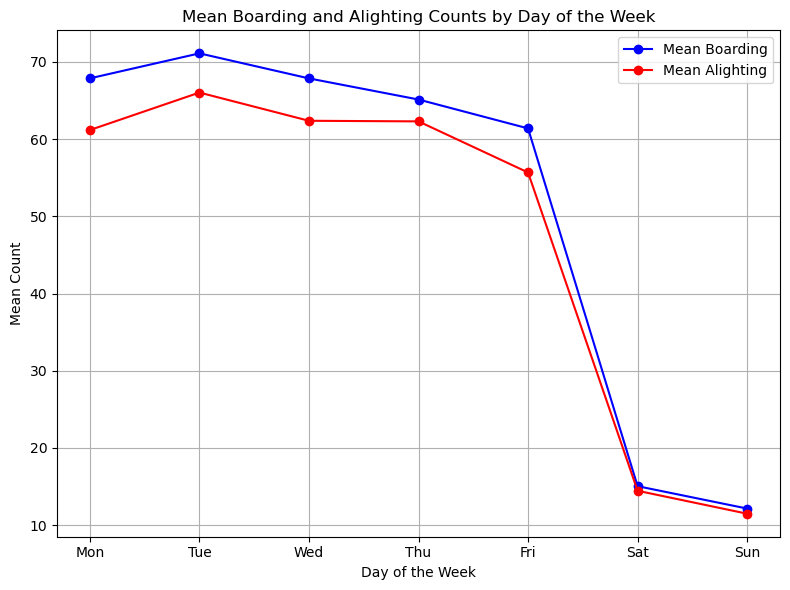

In [121]:
# Plotting
plt.figure(figsize=(8, 6))
plt.plot(mean_ridership['day_of_week'], mean_ridership['boarding'], label='Mean Boarding', marker='o', color='blue')
plt.plot(mean_ridership['day_of_week'], mean_ridership['alighting'], label='Mean Alighting', marker='o', color='red')

# Adding titles and labels
plt.title('Mean Boarding and Alighting Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Count')
plt.xticks(mean_ridership['day_of_week'], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

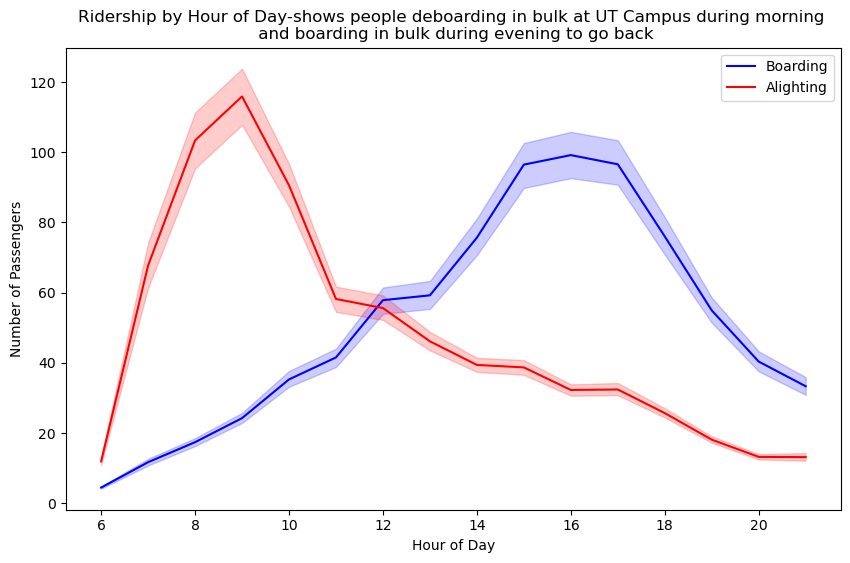

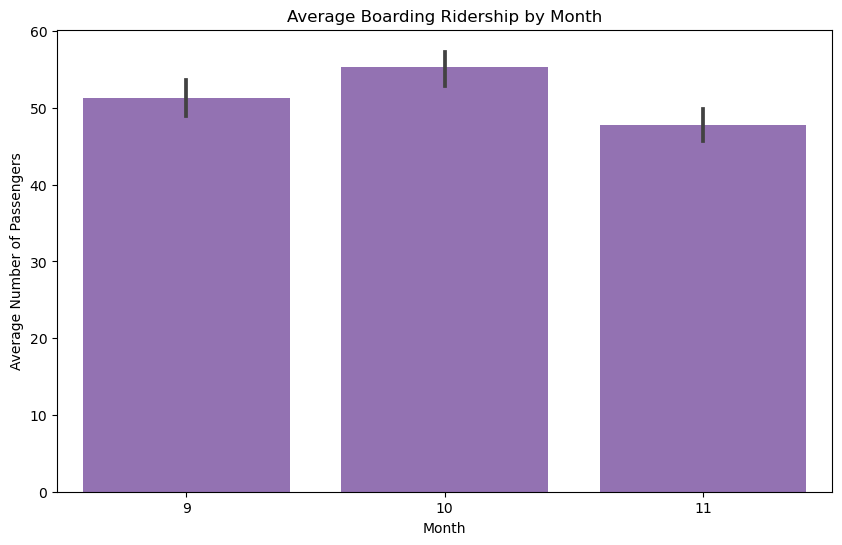

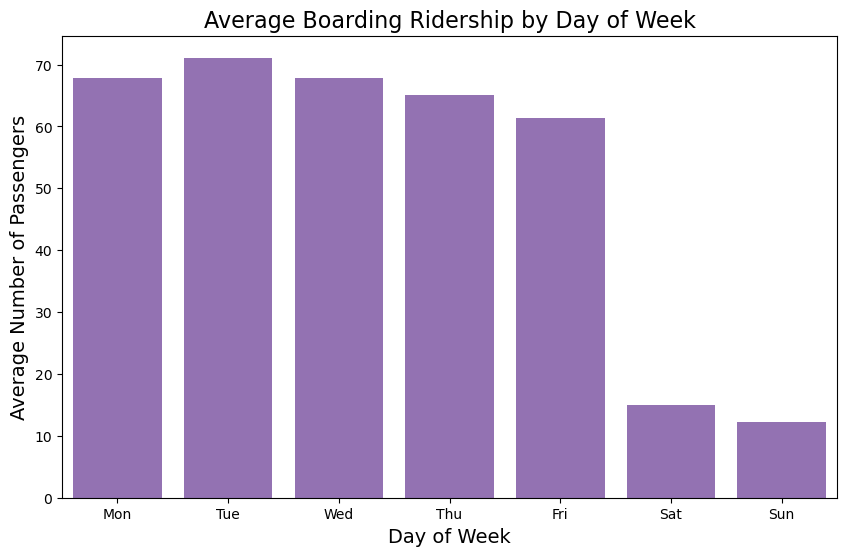

In [123]:
# Ridership by hour of day
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour_of_day', y='boarding', data=df, label='Boarding',color='blue')
sns.lineplot(x='hour_of_day', y='alighting', data=df, label='Alighting', color='red')
plt.title('Ridership by Hour of Day-shows people deboarding in bulk at UT Campus during morning \n and boarding in bulk during evening to go back')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Passengers')
plt.legend()
plt.savefig('boarding_ridership_by_hour.png')
plt.show()

color = "#9467bd"

# Ridership by month
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='boarding', data=df, color=color)
plt.title('Average Boarding Ridership by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Passengers')
plt.show()


# Ridership by day of week
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='boarding', data=mean_ridership, color=color)
plt.title('Average Boarding Ridership by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Average Number of Passengers', fontsize=14)
plt.xticks(mean_ridership['day_of_week'], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.show()

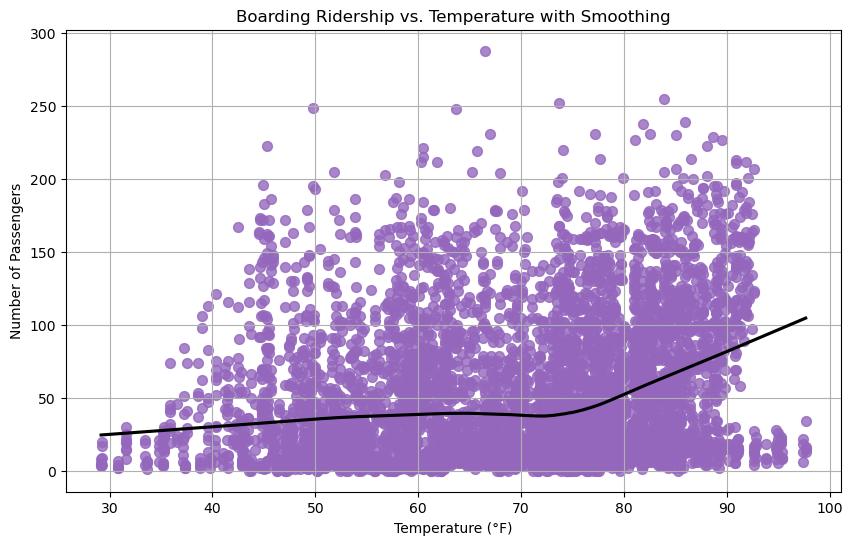

In [125]:
# Relationship between temperature and ridership
plt.figure(figsize=(10, 6))
sns.regplot(x='temperature', y='boarding', data=df, lowess=True, scatter_kws={'s':50}, color='#9467bd', line_kws={'color':'#000000'})
plt.title('Boarding Ridership vs. Temperature with Smoothing')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

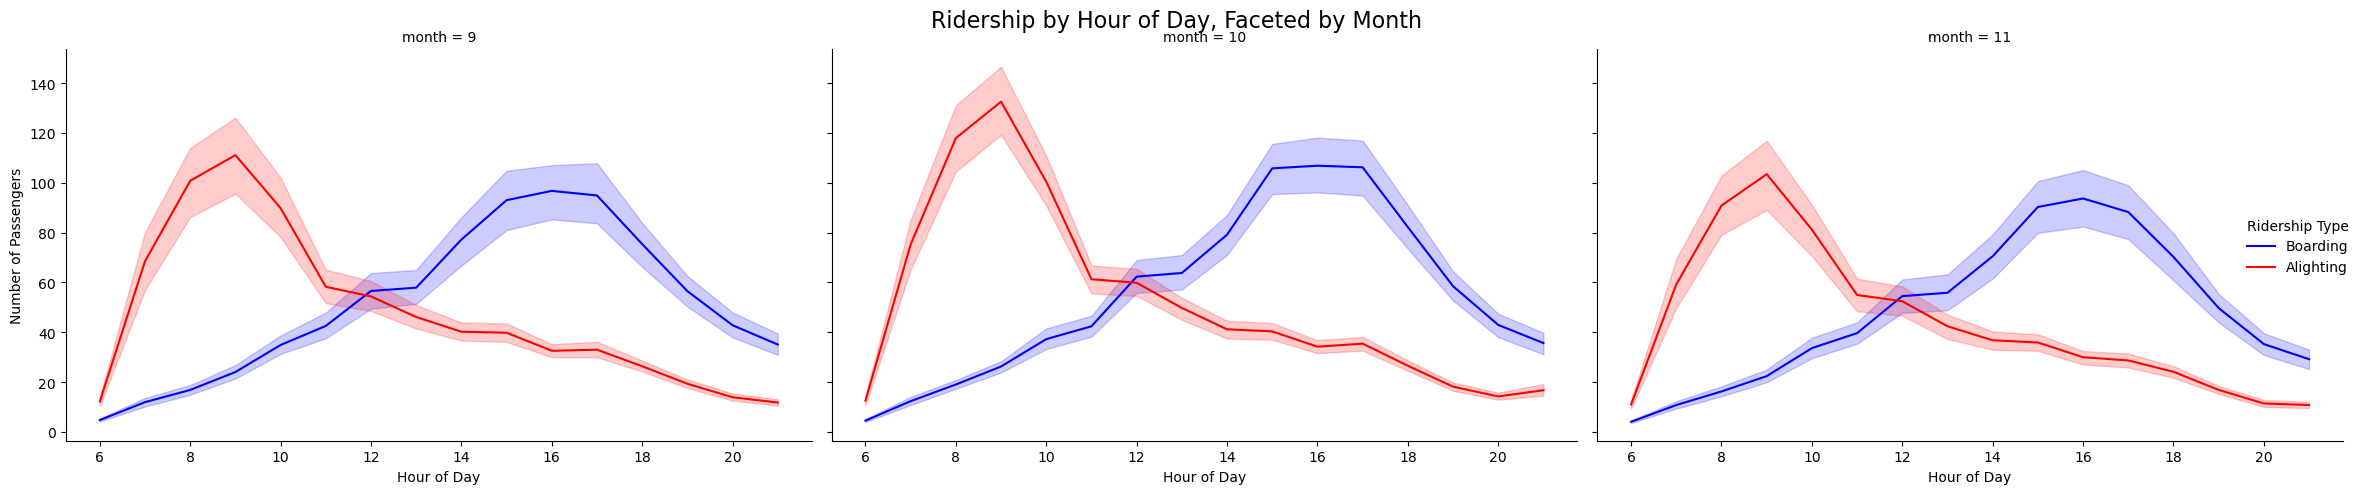

In [127]:
# Ridership by hour of day, faceted by month
g = sns.FacetGrid(df, col='month', col_wrap=3, height=5, aspect=1.5)

# Map lineplots for boarding and alighting with different colors
g.map(sns.lineplot, 'hour_of_day', 'boarding', color='blue', label='Boarding')
g.map(sns.lineplot, 'hour_of_day', 'alighting', color='red', label='Alighting')

# Set axis labels
g.set_axis_labels('Hour of Day', 'Number of Passengers')

# Add a legend and ensure it's placed correctly
g.add_legend(title='Ridership Type')

# Set the title for the entire grid
g.fig.suptitle('Ridership by Hour of Day, Faceted by Month', fontsize=16)

# Adjust layout to prevent title overlap and ensure readability
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9) 
plt.show()


## SUMMARY :

#### Time of day / weekday
1. Majority people deboard at 8-10 am in bulk at the place of work/ school which is UT Austin Campus
2. Most of the people board at 3-5 pm in evening from the campus 
3. This pattern does not follow on weekdays as most travel is for personal reasons.

   ![Boarding Ridership by Hour of Day](boarding_ridership_by_hour.png)

This peak period shows the bus system's role in accommodating the morning rush as well as leaving the campus, suggesting that it effectively serves the start-of-day and goodbye needs of commuters.

#### Weekday:
1. People travel mainly on weekdays, ridership declines on weekend. Fridays are also slighlyy less travel than other weekdays. Most of them might be using personal vehicles, cab, walking or not even visiting university on weekends.

#### Month / Temp:
1. Temperatures are higher in September, while lower in October and November 
2. Ridership is slightly lower in November probably due to holidays ( thanksgiving etc)





# Clustering and dimensionality reduction

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import (KMeans , AgglomerativeClustering)
from scipy.cluster.hierarchy import (dendrogram , cut_tree)
import warnings 
warnings.filterwarnings('ignore')

In [133]:
wine_df = pd.read_csv('wine.csv')
X = wine_df.drop(['color', 'quality'], axis=1)
y = wine_df[['color', 'quality']]

##### Scaling the Dataframe and Dimensionality Reduction

In [136]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

##### Splitting the test and train data

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

#### PCA

In [142]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

##### For tSNE, since variance doesnt really matter, and tSNE focuses on visualizing the data in 2 or 3 dimensions, we chose to run tSNE for both number of components. However, the results obtained were pretty much same.

In [145]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
#tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

##### Tried with **K=2** & **K=7** clusters.
The reason to try out for 7 clusters: We have 7 different qualities of wine, and 2 clusters wasn't able to distinguish between wine qualities, so lets see f 7 clusters can do that.
Howver, 7 clusters didn't help in distinguishing qualities of wine, hence proceeding with 2 clusters.

In [147]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state = 42)
#kmeans = KMeans(n_clusters=7, random_state = 42)

clusters= kmeans.fit_predict(X_scaled)

wine_df['Cluster'] = clusters

# Evaluate clustering
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score for K-Means Clustering: {silhouette_avg:.2f}')

Silhouette Score for K-Means Clustering: 0.28


##### Visualization of WINE COLOR

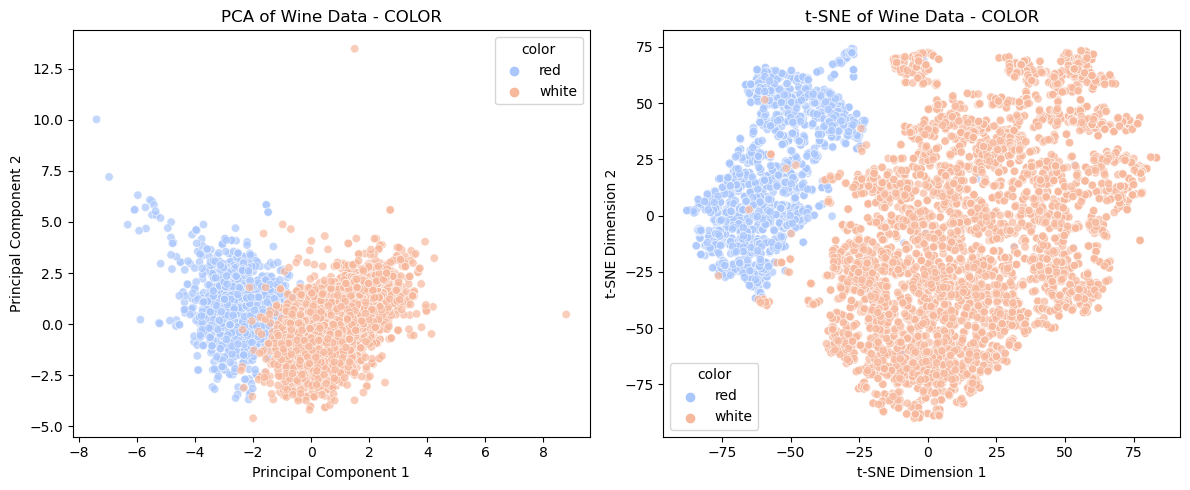

In [149]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=wine_df['color'], palette='coolwarm', alpha=0.7)
plt.title('PCA of Wine Data - COLOR')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=wine_df['color'], palette='coolwarm', alpha=0.7)
plt.title('t-SNE of Wine Data - COLOR')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.tight_layout()
plt.show()

##### Visualization of WINE QUALITY

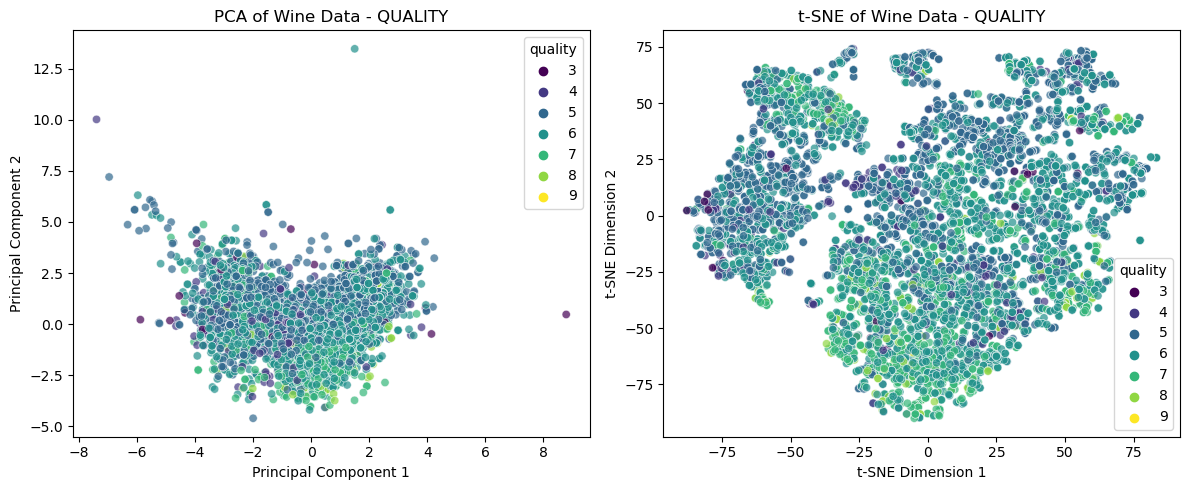

In [154]:
# Check clustering against wine quality
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=wine_df['quality'], palette='viridis', alpha=0.7)
plt.title('PCA of Wine Data - QUALITY')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=wine_df['quality'], palette='viridis', alpha=0.7)
plt.title('t-SNE of Wine Data - QUALITY')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.tight_layout()
plt.show()

##### Trying Clusters on Test and Train Data

In [157]:
# Predict clusters for the test data
clusters_train = kmeans.predict(X_train)
clusters_test = kmeans.predict(X_test)

# Add cluster labels to the test set
df_train = pd.DataFrame(X_train, columns=X.columns)
df_train['cluster'] = clusters_train

df_test = pd.DataFrame(X_test, columns=X.columns)
df_test['cluster'] = clusters_test

# Evaluate clustering performance on the test set

silhouette_avg_train = silhouette_score(X_train, clusters_train)
print(f'Silhouette Score for Test Data: {silhouette_avg_train:.2f}')

silhouette_avg_test = silhouette_score(X_test, clusters_test)
print(f'Silhouette Score for Test Data: {silhouette_avg_test:.2f}')

Silhouette Score for Test Data: 0.28
Silhouette Score for Test Data: 0.27


##### Plot PCA & tSNE results for Train and Test data

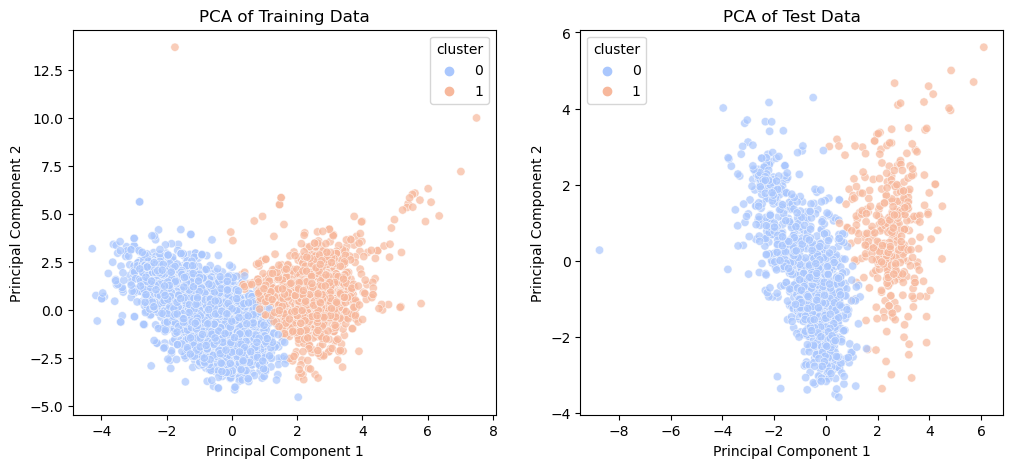

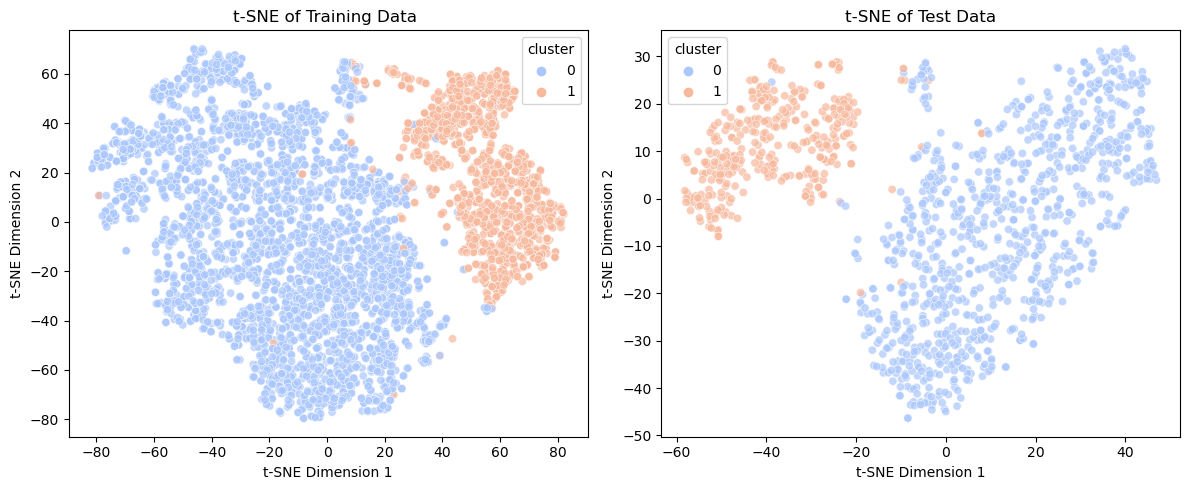

In [160]:
# PCA
pca = PCA(n_components=2)

#TRAIN DATA
X_pca_train = pca.fit_transform(X_train)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca_train[:, 0], y=X_pca_train[:, 1], hue=df_train['cluster'], palette='coolwarm', alpha=0.7)
plt.title('PCA of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# TEST DATA
X_pca_test = pca.transform(X_test)

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca_test[:, 0], y=X_pca_test[:, 1], hue=df_test['cluster'], palette='coolwarm', alpha=0.7)
plt.title('PCA of Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#tSNE
tsne = TSNE(n_components=2, random_state=42)

#TRAIN DATA
X_tsne_train = tsne.fit_transform(X_train)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_tsne_train[:, 0], y=X_tsne_train[:, 1], hue=df_train['cluster'], palette='coolwarm', alpha=0.7)
plt.title('t-SNE of Training Data ')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# TEST DATA
X_tsne_test = tsne.fit_transform(X_test)

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne_test[:, 0], y=X_tsne_test[:, 1], hue=df_test['cluster'], palette='coolwarm', alpha=0.7)
plt.title('t-SNE of Test Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.tight_layout()
plt.show()

### Analysis

##### Based on the results obtained, we can summarize as below:
    1. The **WINE COLOR can be distinguished** using Clustering
    2. The **WINE QUALITY cannot be distinguised** using the same unsupervised technique.
    3. The tSNE algorithm outperformed PCA - as the tSNE clusters are much more distant and has very less overlapping as compared to the PCA
    4. The positive Silhoutte Score code indicates good clustering results, and that the data points belong to the right cluster. However, a lesser score of 0.28 might be because the same clustering results could not isolate the wine quality, although it worked well for wine color

# Market Segmentation

In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

from sklearn.cluster import (KMeans , AgglomerativeClustering)
from scipy.cluster.hierarchy import (dendrogram , cut_tree)

import random

import warnings 
warnings.filterwarnings('ignore')

In [167]:
random.seed(42)
df = pd.read_csv('social_marketing.csv')

##### Filtering out rows, which has zero Adult and Spam tweets

In [170]:
filtered_df = df[(df['adult'] == 0) & (df['spam'] == 0)]

##### Since we have final set of entries now, dropping of the Adult, Spam and UserID columns as these won't be required in further analysis.

In [173]:
filtered_df.drop(['adult', 'spam', 'Unnamed: 0'], axis = 1, inplace = True)

#### Merging Uncategorized with Chatter, as its mentioned that the annotators can consider them under chatter category as well.
##### Later, dropping of uncategorized column

In [176]:
filtered_df['chatter'] = filtered_df['chatter'] + filtered_df['uncategorized']
filtered_df.drop(['uncategorized'], axis = 1, inplace = True)

<Axes: >

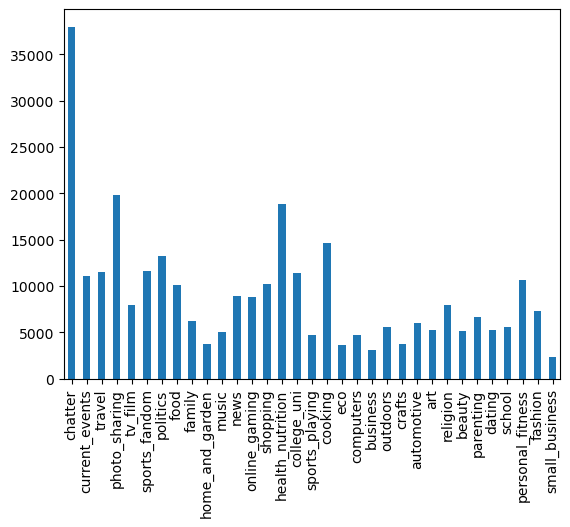

In [178]:
filtered_df.sum().plot(kind='bar')

## Analysis
##### As per the bar plot shown above, the number of tweets is extremely high for Chatter category, as compared to other relevant categories, making this data right-skewed. 
##### We believe, chatter category won't help much in predicting the targetd audience.
##### Hence, let's remove this category all-together to have a more balanced distribution.

In [181]:
filtered_df.drop(['chatter'], axis = 1, inplace = True)

<Axes: >

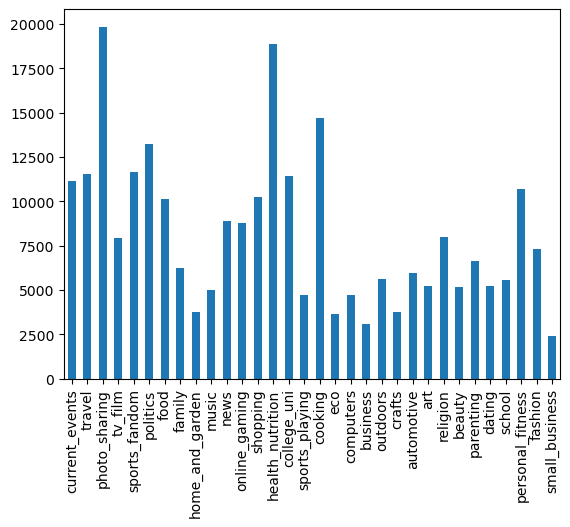

In [183]:
filtered_df.sum().plot(kind='bar')

##### And this gives a balanced sum of tweets in all the relevant categories.

##### Next, we are trying to plot a correlation matrix, calculate the absolute value, identify & plot the top 15 correlated variables. This will give an initial idea of a few latent factors / market segments that can be clubbed together.

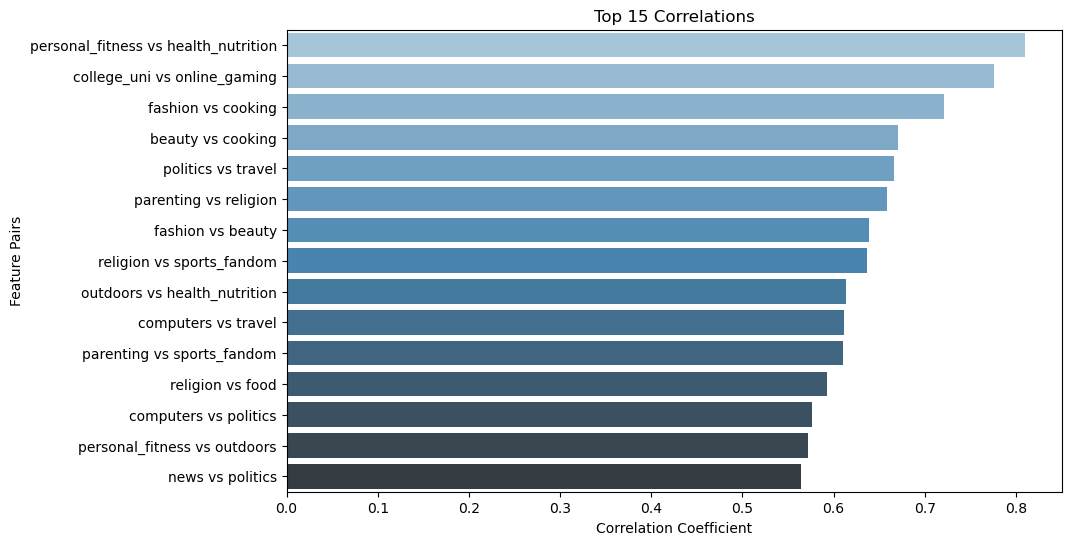

In [187]:
corr_matrix = filtered_df.corr().abs()

# Get the upper triangle of the correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Unstack the matrix, sort by correlation value, and get top 15 correlations
sorted_corr = upper_tri.unstack().sort_values(ascending=False).dropna().head(15)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_corr.values, y=["{} vs {}".format(i[0], i[1]) for i in sorted_corr.index], palette="Blues_d")
plt.title('Top 15 Correlations')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature Pairs')
plt.show()

## Analysis

#### When we analyse the matrix, it gives us a few major market segments, that we can target at: **Personal Fitness & Health Nutrition** | **Colleges, Univerisities & Online Gaming** | **Cooking, Fashion & Beauty**

We are now implementing CLUSTERING, to identify the major segments.

#### Implementing Heirarchical Clustering

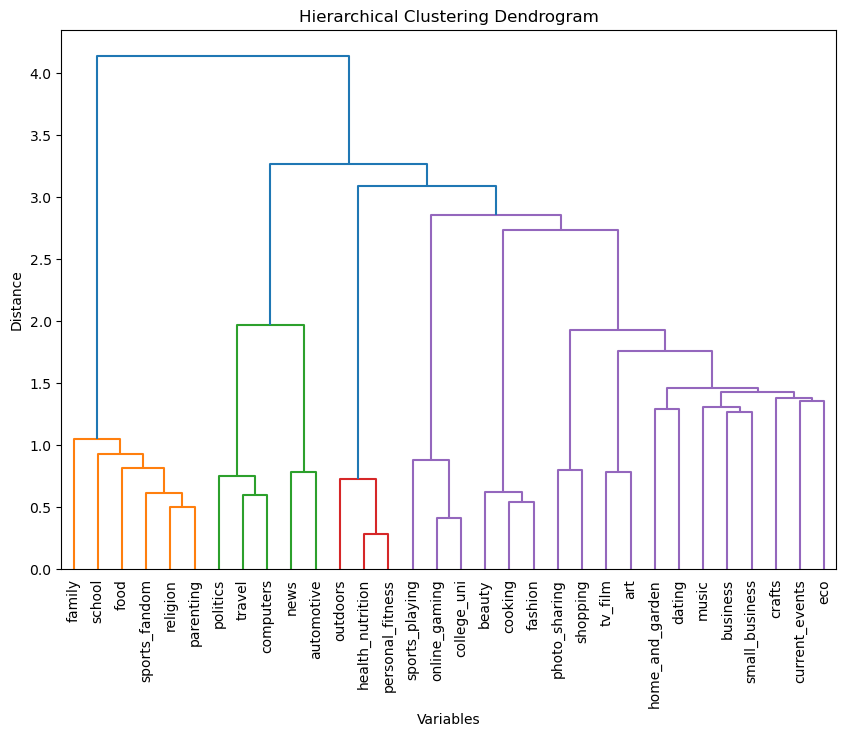

In [191]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(corr_matrix, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Variables')
plt.ylabel('Distance')
dendrogram(Z, labels=corr_matrix.columns, leaf_rotation=90, leaf_font_size=10)
plt.show()

## Analysis

#### As per the dendogram, a few major segments that that can chosen are: **Personal Fitness & Health Nutrition** | **Colleges, Univerisities & Online Gaming** | **Politics, Travels, News**
However, we can see 6 dominant set of clusters and would proceed to try identifying them.

#### Scaling the Dataframe and Dimensionality Reduction

In [195]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(filtered_df)

#### PCA
##### Commented out PCA - as the clusters were not dominant. Hence, we would go with tSNE.

In [198]:
#pca = PCA(n_components=2)
#pca_df = pca.fit_transform(df_scaled)

##### tSNE

In [201]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_scaled) 

X_tsne

array([[-51.76741  , -16.848856 ],
       [ -0.2958079, -30.711943 ],
       [ 43.11017  ,  35.98152  ],
       ...,
       [-29.682611 , -36.742332 ],
       [-41.170902 , -10.764238 ],
       [ 41.9412   ,  41.389435 ]], dtype=float32)

#### Finding the 'K' value for clusters by elbow method

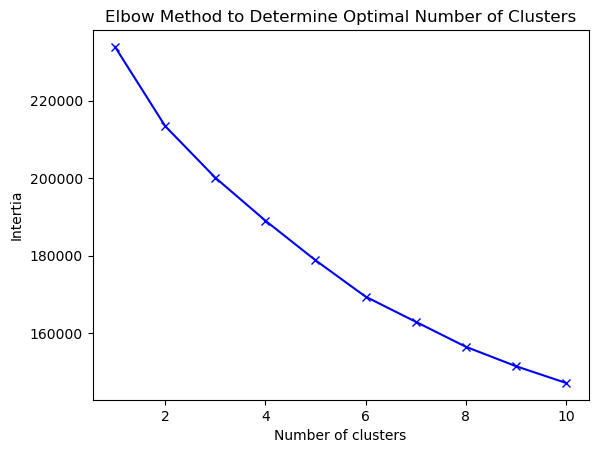

In [204]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(pd.DataFrame(df_scaled))
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, 'bx-')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Intertia')
plt.show()

## Analysis

#### Based on the Elbow plot, 10 seems to be the best value for K, but this would be large enough. Hence, pickiung *k = 6* as we could identify 6 clusters (or market segments) from dendograms.

In [207]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters)
filtered_df['Clusters'] = kmeans.fit_predict(df_scaled)

#### Plotting plot for PCA
##### The clusters are not distinguishable and hence reduction through PCA won't be a good fit for Clustering

In [210]:
#plt.figure(figsize=(8,8))
#ax=sns.scatterplot(x=pca_df[:, 0],y=pca_df[:, 1],hue=filtered_df['Clusters'],palette=['red','purple','blue','pink', 'yellow', 'orange'])
#plt.title("PCA for Market Segmentation")
#plt.show()

#### Plotting plot for tSNE
##### Clusters are distingushable here, although overlapping

Text(0, 0.5, 't-SNE Dimension 2')

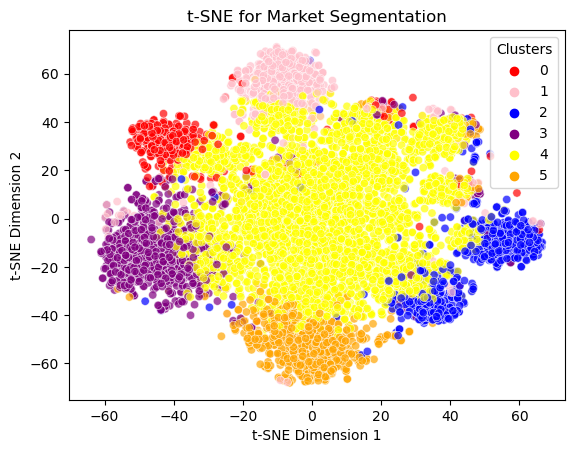

In [213]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=filtered_df['Clusters'], palette=['red','pink','blue','purple', 'yellow', 'orange'], alpha=0.7)
plt.title('t-SNE for Market Segmentation')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

<Axes: xlabel='Clusters', ylabel='count'>

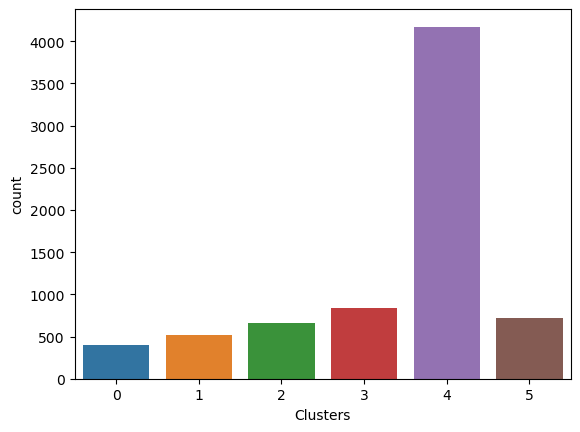

In [215]:
sns.countplot(x='Clusters', data=filtered_df)

#### Cluster Summary to get the weightage of every category in the different clusters

In [218]:
cluster_summary = filtered_df.groupby('Clusters').mean()
cluster_summary

current_events    travel  photo_sharing   tv_film  sports_fandom  \
Clusters                                                                     
0               1.491139  1.544304       2.817722  1.739241       1.308861   
1               1.780534  1.503817       6.072519  1.093511       1.116412   
2               1.652504  5.584219       2.561457  1.206373       2.018209   
3               1.522156  1.222754       2.706587  0.983234       1.140120   
4               1.445457  1.073124       2.315991  1.015344       0.966675   
5               1.659310  1.291034       2.673103  1.091034       5.846897   

          politics      food    family  home_and_garden     music  ...  \
Clusters                                                           ...   
0         1.273418  1.227848  1.053165         0.617722  0.964557  ...   
1         1.412214  1.028626  0.874046         0.608779  1.299618  ...   
2         8.939302  1.453718  0.928680         0.617602  0.646434  ...   
3         1.245509  2.094611  0.755689         0.617964  0.725749  ...   
4         1.023016  0.748022  0.562455         0.431791  0.573004  ...   
5         1.115862  4.521379  2.460690         0.651034  0.729655  ...   

          automotive       art  religion    beauty  parenting    dating  \
Clusters                                                                  
0           0.853165  1.205063  0.825316  0.435443   0.658228  0.724051   
1           0.849237  0.906489  0.820611  3.954198   0.748092  0.822519   
2           2.368741  0.717754  1.033384  0.471927   0.939302  1.072838   
3           0.626347  0.753293  0.724551  0.428743   0.736527  1.022754   
4           0.567250  0.608247  0.526013  0.344282   0.442580  0.547351   
5           1.027586  0.866207  5.179310  1.106207   4.028966  0.881379   

            school  personal_fitness   fashion  small_business  
Clusters                                                        
0         0.493671          0.977215  0.896203        0.455696  
1         0.969466          1.356870  5.606870        0.475191  
2         0.738998          1.006070  0.682853        0.485584  
3         0.562874          6.427545  0.777246        0.289820  
4         0.464637          0.647567  0.518820        0.266123  
5         2.678621          1.182069  1.046897        0.393103  

[6 rows x 32 columns]

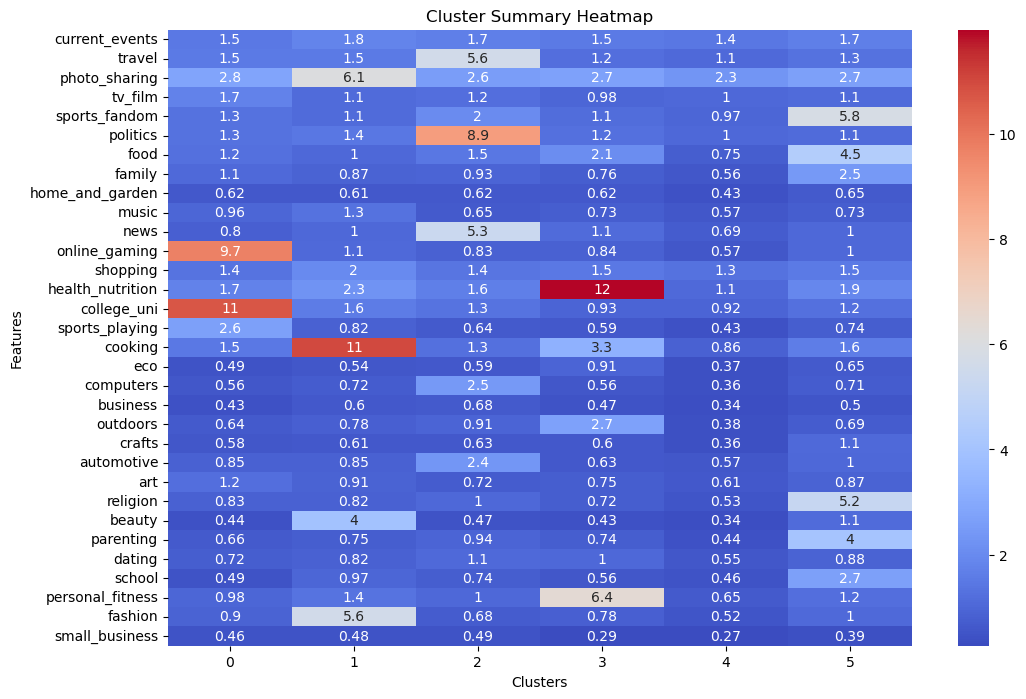

In [220]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary.T, annot=True, cmap='coolwarm')
plt.title('Cluster Summary Heatmap')
plt.xlabel('Clusters')
plt.ylabel('Features')
plt.show()

## Analysis

#### Based on the heatmap created out of cluster_summary, we can analyse that a few market can be targeted for wider set of audience:

1. **Health & Nutrition & Personal Fitness** : These two categories are higly correlated, as seen in the correlation plot earlier. Being the top most weighted categories, a strong focus could be put on health, wellness, fitness and nutrition.

2. **Politics, News** : Politics related contents can stand out in their social-media audience. News stores in similar sector can gain traction and popularity as well. This cluster also shows high interest in **Travel**, which presents an opportunity to explore how travel contents can be connected with politics or news to better engage the audience.

3. **College/Universities; Online gaming** : As per cluster 4, the university/college going public and online gaming suggest a valuable opportunity and a major market segment to target.

4. **Cooking, Fashion, Beauty** : This cluster shows a strong interest in Cooking and fashion, and when combined with beauty indicates a women-focused segment. The weightage on the **Photo-sharing** category suggests a great opportunity to engage these audience through photo contest / social media posts related to these categories, which could attract a wide range of women.

# The Reuters corpus

##### Please note that the Apporach, Result and Conclusion for this problem statement is provided at the end of this section, after all the codes implementation.

In [226]:
#Import required libraries

import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [228]:
# Define directories for training and test data
train_dir = 'ReutersC50\\C50train'
test_dir = 'ReutersC50\\C50test'

# Define lists to hold document contents and author names
train_documents = []
train_authors = []

test_documents = []
test_authors = []

# Function to handle file reading
def read_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            return f.read()
    except PermissionError:
        print(f"Permission denied: {file_path}")
        return None
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None

# Function to process a directory and append data to lists
def process_directory(directory, documents_list, authors_list):
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            doc_content = read_file(file_path)
            if doc_content:
                documents_list.append(doc_content)
                author = os.path.basename(root)
                authors_list.append(author)

# Process training and test directories
process_directory(train_dir, train_documents, train_authors)
process_directory(test_dir, test_documents, test_authors)

# Create DataFrames
train_data = pd.DataFrame({'author': train_authors, 'document': train_documents})
test_data = pd.DataFrame({'author': test_authors, 'document': test_documents})

# Display the first few rows of each DataFrame
print("Training Data:")
print(train_data.head())

Training Data:
          author                                           document
0  AaronPressman  The Internet may be overflowing with new techn...
1  AaronPressman  The U.S. Postal Service announced Wednesday a ...
2  AaronPressman  Elementary school students with access to the ...
3  AaronPressman  An influential Internet organisation has backe...
4  AaronPressman  An influential Internet organisation has backe...


In [230]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import SnowballStemmer

# Initialize the stemmer
stemmer = SnowballStemmer("english")

# Text preprocessing function
def preprocess_text(text):
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and stem, while removing stop words
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# Apply the preprocessing
train_data['cleaned_document'] = train_data['document'].apply(preprocess_text)

print(train_data.head())

          author                                           document  \
0  AaronPressman  The Internet may be overflowing with new techn...   
1  AaronPressman  The U.S. Postal Service announced Wednesday a ...   
2  AaronPressman  Elementary school students with access to the ...   
3  AaronPressman  An influential Internet organisation has backe...   
4  AaronPressman  An influential Internet organisation has backe...   

                                    cleaned_document  
0  internet overflow new technolog crime cyberspa...  
1  postal servic announc wednesday plan boost onl...  
2  elementari school student access internet lear...  
3  influenti internet organis back away propos dr...  
4  influenti internet organis back away propos dr...  


In [231]:
# Checking if there are any empty documents after preprocessing
empty_docs = train_data[train_data['cleaned_document'].str.strip().eq('')].shape[0]
print(f"Number of empty documents after preprocessing: {empty_docs}")

# Save the processed data to a CSV file
processed_data_path = r'ReutersC50\processed_data.csv'
train_data.to_csv(processed_data_path, index=False)

print(f"Processed data saved to {processed_data_path}")

Number of empty documents after preprocessing: 0
Processed data saved to ReutersC50\processed_data.csv


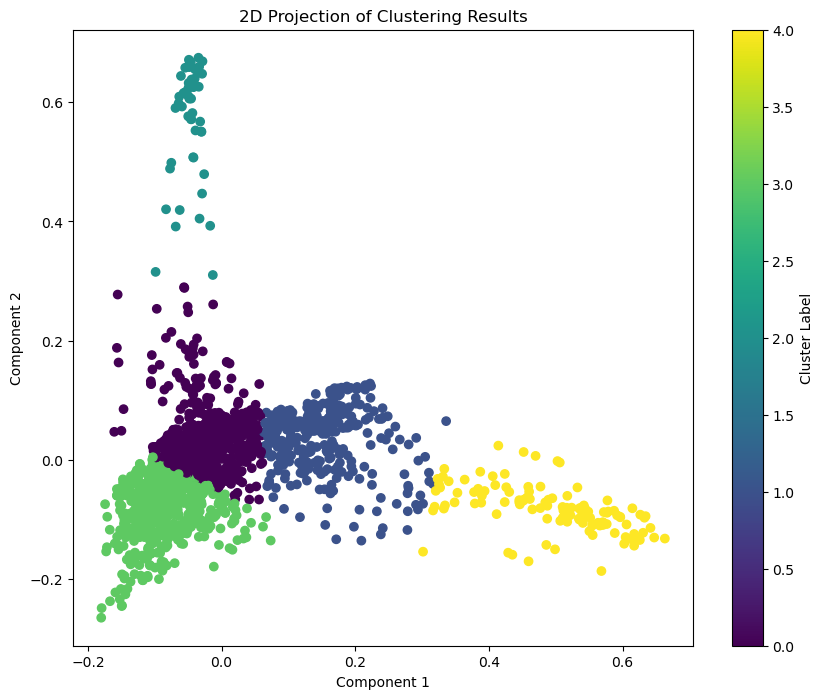

In [232]:
# Convert documents to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)  # Limit the number of features as more than it will causing memory issue
tfidf_matrix_train = tfidf_vectorizer.fit_transform(train_data['cleaned_document'])

# Apply PCA for dimensionality reduction to 2 components, 
#apply it for around 1000 components was giving 80% variance covered by 800 components. 
#But it was difficult to process data visualization for 800 principal components.
pca = PCA(n_components=2)
pca_components = pca.fit_transform(tfidf_matrix_train.toarray())  # Convert sparse matrix to dense array

# Perform clustering using K-Means
kmeans = KMeans(n_clusters=5, random_state=42)  # We tried 3,4,5,6 clusters and acheived best results at 5
clusters = kmeans.fit_predict(pca_components)

# Add cluster labels to the data
train_data['cluster'] = clusters

# Create a scatter plot of Component 1 vs Component 2
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis', label='Cluster')
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D Projection of Clustering Results')
plt.show()


In [233]:
# Create a DataFrame for the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Add cluster labels to the DataFrame
tfidf_df['cluster'] = clusters

# Aggregate TF-IDF scores for each word in each cluster
cluster_word_scores = tfidf_df.groupby('cluster').sum()

# Create a DataFrame to store the top words per cluster
top_words_per_cluster = pd.DataFrame()

for cluster in cluster_word_scores.index:
    cluster_scores = cluster_word_scores.loc[cluster]
    top_words = cluster_scores.sort_values(ascending=False).head(100)
    top_words_df = pd.DataFrame({
        'word': top_words.index,
        'score': top_words.values,
        'cluster': cluster
    })
    top_words_per_cluster = pd.concat([top_words_per_cluster, top_words_df], axis=0)

top_words_per_cluster

word      score  cluster
0          said  73.653867        0
1       compani  34.668882        0
2          year  25.257823        0
3        market  24.495680        0
4           new  24.214946        0
..          ...        ...      ...
95      protest   1.503430        4
96    communist   1.502412        4
97     demonstr   1.499026        4
98       replac   1.490432        4
99  kong govern   1.485560        4

[500 rows x 3 columns]

In [238]:
# We extracted top 100 word of each category to excel file for understanding pattern of each cluster.

top_words_per_cluster.to_excel('Reuter Corpus Output.xlsx', index=False, sheet_name='Sheet1')

### **Questions:**
1. What are the primary themes and topics within the ReuterC50 text dataset?
2. How do different clusters of terms relate to specific industries or domains?
3. What insights can be drawn about the structure and content of the dataset based on the clustering results?


### **Approach:**
To address these questions, we used a series of **Text Preprocessing:**  **text analysis techniques:

**Text Preprocessing:** Data was cleaned and preprocessed to ensure it was suitable for analysis. This involved removing Non-Alphabetic Characters, stripping out any characters that were not letters or whitespace, converting to lowercase to ensure uniformity and stemming and stop words removal to reduce words to their root forms and filtering out common stop words that do not contribute to the analysis.

**TF-IDF Vectorization:** We transformed the cleaned text data into numerical features using Term Frequency-Inverse Document Frequency (TF-IDF). This method helped highlight the importance of terms in relation to individual documents and the overall corpus.

**Principal Component Analysis (PCA):** PCA was employed to reduce the dimensionality of the TF-IDF vectors. This allowed us to visualize the clustering results more effectively by focusing on the principal components that capture the most variance in the data.

**K-Means Clustering:** K-Means clustering was applied to the reduced data to group documents into clusters. This technique identifies natural groupings in the data based on term similarities.

**Top Words per Cluster:** We analyzed the top words within each cluster by calculating the TF-IDF scores. This helped identify the most significant terms that characterize each cluster.

### **Results:**
#### **Clustering Results and Interpretations:**

**Cluster 0: Finance and Business Metrics**
This cluster comprises terms predominantly related to finance, economics, and business operations. Key terms include various financial measurements (e.g., "million," "billion"), financial entities (e.g., "company," "market"), and business outcomes (e.g., "profit," "price"). Focus here is on financial analysis and market metrics. This cluster is essential for stakeholders interested in understanding financial performance, market trends, and business valuations.

**Cluster 1: Political and Legislative Dynamics**
This cluster features terms associated with political processes, governance, and legislative matters. Key terms include legislative terms (e.g., "legislature," "committee"), and political concepts (e.g., "democracy," "freedom"). The cluster provides a snapshot of political and legislative issues, focusing on governance and political movements. It is relevant for stakeholders involved in policy-making, political analysis, and international relations, offering insights into political structures and legislative activities.

**Cluster 2: Automotive Industry and Labor Relations**
This cluster centers around the automotive industry and related labor issues. Key terms include automotive brands and companies (e.g., "GM," "Ford"), labor terms (e.g., "strike," "union"), and manufacturing details (e.g., "plant," "worker"). This cluster focuses on automotive industry terms and labor relations, highlighting significant issues related to automotive production and labor disputes. This cluster is crucial for stakeholders in the automotive sector and labor organizations, providing insights into industry dynamics, labor conditions, and manufacturing challenges.

**Cluster 3: General Business and Economic Concepts**
This cluster includes a wide range of business and economic terms but is less specialized than Cluster 0. Key terms include general business concepts (e.g., "company," "market"), economic measures (e.g., "percent," "billion"), and business actions (e.g., "deal," "report"). The general nature of this cluster makes it relevant for a broad understanding of business and economic conditions. It offers a comprehensive view of various business activities and economic factors.

**Cluster 4: China and Global Relations**
This cluster focuses on China and its international relations, with terms related to Chinese politics, international trade, and human rights. Key terms include locations and entities ("China," "Beijing," "Hong Kong"), political issues ("human rights," "trade"), and international relations ("foreign"). The focus on China and global relations provides valuable context for understanding China's position on the world stage, including its political dynamics and international interactions. This cluster is particularly relevant for stakeholders involved in international trade, diplomacy, and global policy.

### **Visualization:**

**2D Projection of Clustering Results:**

The scatter plot below visualizes the 2D projection of the PCA components, color-coded by cluster labels. This plot provides an intuitive view of how the documents are distributed across the identified clusters.

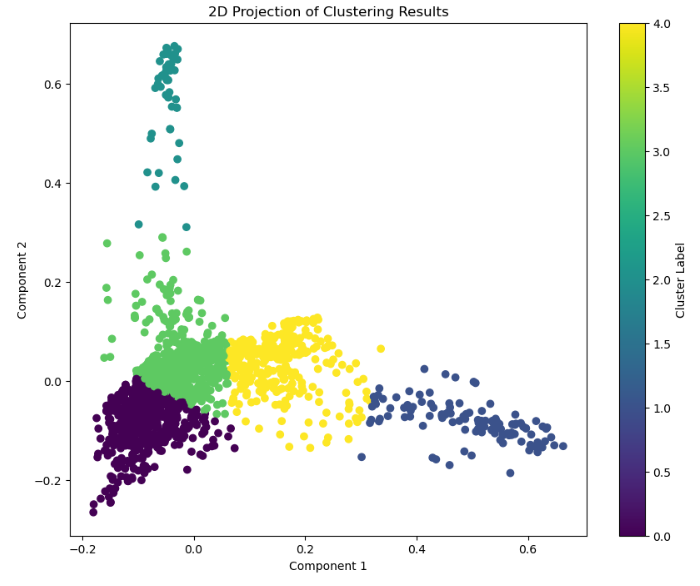


**Top Words per Cluster:**

Below are the top words for each cluster based on their TF-IDF scores. This table provides insights into the key terms driving the thematic distinctions between clusters.

Cluster	Top Words:

0: 	**million, billion, company, profit**

1: 	**democracy, legislature, Chris Patten**

2: 	**GM, Ford, strike, union**

3: 	**company, market, deal, report**

4: 	**China, Beijing, human rights, trade** trade

For a detailed list of the top 100 words per cluster and their scores, please refer to the attached Excel file: **Reuter Corpus Output.xlsx**

### **Conclusion:**
The analysis of the ReuterC50 text dataset reveals distinct thematic clusters that reflect different domains of interest. The clusters provide valuable insights into the primary themes covered in the dataset:

1. Finance and Business Metrics
2. Political and Legislative Dynamics
3. Automotive Industry and Labor Relations
4. General Business and Economic Concepts
5. China and Global Relations

The clustering and top word analysis provide a comprehensive view of the dataset's thematic structure, aiding stakeholders in extracting relevant information and making informed decisions based on the dataset's content.

# Association Rule Mining

In [ ]:
#pip install mlxtend

In [248]:
# Import required libraries for apriori and association rule
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx

In [250]:
# Let us read groceries.txt file line by line, and add all items of a row as a list

basket_list = []     #Initiate empty list to add all items in a row as list

with open('groceries.txt', 'r') as file:    # open file
    for line in file:                       # read file line by line
        row = line.strip().split(',')       # remove trailing and leading spaces from line, seperate items by ,
        basket_list.append(row)              # add each row to basket list

In [252]:
#import library to preprocess basket list
from mlxtend.preprocessing import TransactionEncoder

#Transaction encoder will make each unique item in this dataset as a column, 
#and then it will fill etries as TRUE and FALSE for each row if that item is present in that list
te = TransactionEncoder()
te_ary = te.fit(basket_list).transform(basket_list)
df = pd.DataFrame(te_ary, columns=te.columns_)      #converting transaction encoder output to a dataframe object

In [254]:
# Get the sum of True counts for each column
true_counts = df.sum().sort_values(ascending = False)
true_counts[:20]

whole milk               2513
other vegetables         1903
rolls/buns               1809
soda                     1715
yogurt                   1372
bottled water            1087
root vegetables          1072
tropical fruit           1032
shopping bags             969
sausage                   924
pastry                    875
citrus fruit              814
bottled beer              792
newspapers                785
canned beer               764
pip fruit                 744
fruit/vegetable juice     711
whipped/sour cream        705
brown bread               638
domestic eggs             624
dtype: int64

In [256]:
columns_to_drop = true_counts[true_counts > 1000].index  
# Analysis with everything included for creating rules is creating 
#some misleading outcomes beacause of lost of most frequent items. I found it better aproach 
#to drop items which appear more than 1000 times in all transactions.

# Drop those columns from the DataFrame
df_filtered = df.drop(columns=columns_to_drop)

In [258]:
frequent_itemsets = apriori(df_filtered, min_support=0.005, use_colnames=True)  #Using apriori method to find frequent items in basket, 
#support value indicates minimum threshold for probability of that item being in list

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=2.0)    #This method will create all the rules which has lift value higher than threshold lift 2.


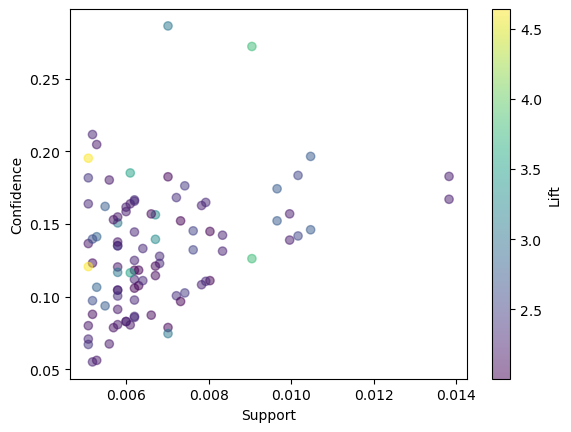

In [260]:
# Plot all the rules in (support, confidence) space
plt.scatter(rules['support'], rules['confidence'], alpha=0.5, c=rules['lift'], cmap='viridis')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(label='Lift')
plt.show()

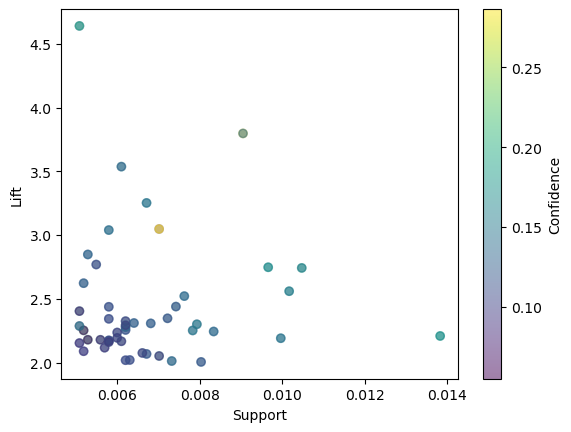

In [262]:
# Swap axes and color scales
plt.scatter(rules['support'], rules['lift'], alpha=0.5, c=rules['confidence'], cmap='viridis')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.colorbar(label='Confidence')
plt.show()

In [264]:
# Filter rules based on support and confidence
filtered_rules = rules[(rules['lift'] > 2.5)]

# Inspect the filtered rules
print(filtered_rules)

                   antecedents                 consequents  \
2                       (beef)                      (pork)   
3                       (pork)                      (beef)   
4                    (berries)        (whipped/sour cream)   
5         (whipped/sour cream)                   (berries)   
12             (domestic eggs)                    (butter)   
13                    (butter)             (domestic eggs)   
20                    (butter)        (whipped/sour cream)   
21        (whipped/sour cream)                    (butter)   
26                   (chicken)         (frozen vegetables)   
27         (frozen vegetables)                   (chicken)   
32                 (chocolate)  (long life bakery product)   
33  (long life bakery product)                 (chocolate)   
34                 (chocolate)                   (waffles)   
35                   (waffles)                 (chocolate)   
48                      (curd)                   (dessert)   
49      

### ANALYSIS:
In this analysis, we selected a **Lift threshold of 2** and a **Confidence threshold of 0.005** for association rule mining. 
The choice of a lift threshold of 2 was intentional, as it focuses on identifying item pairs that are at least twice as likely to be purchased together than if they were independent. This ensures that the rules discovered have a significant level of association. 
On the other hand, we set a confidence threshold of 0.005 to capture even the weaker associations that might still be of interest, especially in a large and diverse dataset. This allows the model to identify subtle but potentially important patterns.

In the context of association rule mining, including all items, especially the most frequent ones, often leads to misleading outcomes. This is because the most frequent items dominate the rules, masking potentially more insightful associations.  Hence, from our analysis we exclude items that appear more than 1000 times across all transactions, allowing for the discovery of more meaningful and less obvious rules.

Here are some potentially good relationships based on the item pairs:

**Pork and Beef Pairs: (pork) -> (beef) and (beef) -> (pork) Insight:** Pork and beef are often complementary items in meal planning, especially in households that frequently cook meat. The bidirectional association suggests that customers who buy one type of meat are likely to buy the other.

**Berries and Whipped/Sour Cream Pairs: (berries) -> (whipped/sour cream) and (whipped/sour cream) -> (berries) Insight:** Berries and whipped cream are commonly consumed together, especially in desserts. This relationship suggests a strong association between these two items, likely because they are often purchased together for recipes.

**Butter and Domestic Eggs Pairs: (butter) -> (domestic eggs) and (domestic eggs) -> (butter) Insight:** Butter and eggs are used in many baking recipes, which could explain their strong association. Customers buying one are likely preparing for baking and hence purchase the other as well.

**Frozen Vegetables and Chicken Pairs: (frozen vegetables) -> (chicken) and (chicken) -> (frozen vegetables) Insight:** This pair suggests a meal preparation pattern where frozen vegetables and chicken are bought together, possibly for easy-to-prepare meals like stir-fries or roasted dishes.

**Long Life Bakery Products and Chocolate Pairs: (long life bakery product) -> (chocolate) and (chocolate) -> (long life bakery product) Insight:** This could reflect a pattern where customers are purchasing treats or snacks together. Chocolate and long life bakery products are both items with long shelf lives, making them common together in purchases for stocking up.

**Napkins and Hygiene Articles Pairs: (napkins) -> (hygiene articles) and (hygiene articles) -> (napkins) Insight:** This association suggests that customers consider napkins and hygiene articles as related items, potentially because they are often found together in household shopping for personal care products.

**White Bread and Ham Pairs: (white bread) -> (ham) and (ham) -> (white bread) Insight:** White bread and ham are frequently bought together, likely because they are common ingredients for making sandwiches. This is a classic combination in grocery shopping.

**Sliced Cheese and Sausage Pairs: (sliced cheese) -> (sausage) and (sausage) -> (sliced cheese) Insight:** This pair is also likely related to meal preparation, particularly for sandwiches, where cheese and sausage are common components.

**Waffles and Chocolate Pairs: (waffles) -> (chocolate) and (chocolate) -> (waffles) Insight:** Waffles and chocolate might be paired together for dessert or breakfast dishes, where chocolate is used as a topping or filling for waffles. These relationships can help in understanding customer buying patterns, optimizing store layouts, or designing marketing strategies such as promotions that group these items together.

# Image Classification with neural networks

In [269]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns


##### Load the data

In [272]:
data_dir = 'EuroSAT_RGB'
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(data_dir, transform=transform)

##### Split Train and Test Data in 80-20 ratio

In [275]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#### Defining the Model
    1. ResNet-18 is a pre-defined model, which has already learned to extract general features from images.
    2. Since we have 11 categories of image, the output of the final layer has to match the number of categories.

In [278]:
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 11)  # 11 classes
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

##### Training the Model

In [ ]:
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward() 
        optimizer.step()
        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}')

##### Evaluate the model on Training set

In [ ]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

model.eval()
running_loss = 0.0
correct = 0
total = 0
train_y_true = []
train_y_pred = []
with torch.no_grad():
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        train_y_true.extend(labels.cpu().numpy())
        train_y_pred.extend(preds.cpu().numpy())

    val_loss = running_loss / len(val_loader)
    val_accuracy = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
accuracy = accuracy_score(train_y_true, train_y_pred)
print(f'Train Accuracy: {accuracy * 100:.2f}%')

##### Evaluate the model on the TEST set

In [ ]:
# 5. Evaluate the model
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

accuracy = accuracy_score(y_true, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

In [ ]:
# 6. Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# 7. Display some test images with predictions
def imshow(image, title):
    image = image / 2 + 0.5  # unnormalize
    npimg = image.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = model(images.to(device))
_, preds = torch.max(outputs, 1)

# Show a few images
for i in range(15):
    imshow(images[i], f'Predicted: {dataset.classes[preds[i]]}, Actual: {dataset.classes[labels[i]]}')

### Analysis

#### Accuracy
    1. The accuracy on Training set is : 92%
    2. The accuracy on Test set is : 91%
This shows our model is working quite well in classifying the images into the relevant categories. Since, the accuracy of train and test set is almost similar, it indicates that the model is not overfitting.

#### Confusion Matrix
    1. The confusion matrix clearly shows that a majority of images have been recognised and classified in its relevant category pretty well. The approximate accuracies for each of the 11 categories are mentioned below and has been calculated as : (total number of correctly predicted image / total number of image available)
        a. Annual Crop : 
        b. Forest : 
        c. Herbaceous Vegetation : 
        d. Highway : 
        e. Industrial : 
        f. Pasture : 
        g. Permanent Crop : 
        h. Residential : 
        i. River :
        j. Sea Lake :